<a href="https://colab.research.google.com/github/anuragtaiskar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Anurag Taiskar

# **Project Summary -**

-The Bike Sharing Demand dataset consist of 8760 observation with 14 features and it is a regression problem because its target column is containing numerical quantity and the main goal is to predict the number of bike demand on the hourly basis.

-After loading the dataset, first performed data preprocessing and checking data types, missing values, duplicate values and data description. In this dataset there are neither null values nor duplicate values. After that changed the date type to Date Time which was initially a string object.

-After that Exploratory Data Analysis is performed to obtain the insights of our dependent variable Rented Bike Counts. Various graphs are constructed to comparing the Rented Bike Count column with other columns. It contain Univariat Analysis, Bivariate Analysis and Multivariate Analysis . Bike rental count is higher during weekdays than weekend days. The rental bike counts are at its peak at 8 AM in the morning and 6pm in the evening. Highest rental bike count is during Autumn and summer seasons and the lowest in winter season.

-After that feature engineering comes in to remove multicollinearity. square root method to normalize the target variable because the skewness is moderate. For scaling independent features, MinMaxScaling is used. Pandas dummies variable is used for encoding the categorical features and map is used to mapping other categorical variable

-After that modeling part begins and 7 regression algorithms is used which is, Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressior, Random Forest Regressor and Xgbregressor. After fitting the models and evaluating metrics (MAE, MSE, RMSE, R Square) and also hyperparameter tuning. In this observation Random Forest Regressor gives accuracy is 98.79 on training data and 91.05 on test data. So Random Forest Regressor model is the best for predicting the bike rental count on an hourly basis.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [183]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings will not shows any warning while we make changes in dataframe
 
import warnings
warnings.filterwarnings('ignore')

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [185]:
# Load Dataset
bsds=pd.read_csv("/content/drive//MyDrive//Bike Sharing Demand Prediction/SeoulBikeData.csv", encoding='latin' )


### Dataset First View

In [186]:
# Dataset First 10 row
bsds.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

In [187]:
# Dataset last 10 Rows 
bsds.tail(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8750  30/11/2018                761    14              7.8           20   
8751  30/11/2018                768    15              7.0           20   
8752  30/11/2018                837    16              7.2           23   
8753  30/11/2018               1047    17              6.0           29   
8754  30/11/2018               1384    18              4.7           34   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8750               2.2              2000                      -13.8   
8751               3.3              1994                      -14.4   
8752               1.5              1945                      -12.6   
8753               2.1              1877                      -10.7   
8754               1.9              1661                       -9.8   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8750                     1.67           0.0            0.0  Autumn   
8751                     1.21           0.0            0.0  Autumn   
8752                     0.72           0.0            0.0  Autumn   
8753                     0.23           0.0            0.0  Autumn   
8754                     0.00           0.0            0.0  Autumn   
8755                     0.00           0.0            0.0  Autumn   
8756                     0.00           0.0            0.0  Autumn   
8757                     0.00           0.0            0.0  Autumn   
8758                     0.00           0.0            0.0  Autumn   
8759                     0.00           0.0            0.0  Autumn   

         Holiday Functioning Day  
8750  No Holiday             Yes  
8751  No Holiday             Yes  
8752  No Holiday             Yes  
8753  No Holiday             Yes  
8754  No Holiday             Yes  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [188]:
# Dataset Rows & Columns count
print(bsds.shape)
print('No. of Rows =',bsds.shape[0] )
print('No. of columns =',bsds.shape[1])

(8760, 14)
No. of Rows = 8760
No. of columns = 14


In [189]:
# rename columns

bsds.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                     'Temperature(°C)':'Temperature',
                     'Humidity(%)':'Humidity',
                     'Wind speed (m/s)':'Wind_speed',
                     'Visibility (10m)':'Visibility',
                     'Dew point temperature(°C)':'Dew_point_temperature',
                     'Solar Radiation (MJ/m2)':'Solar_Radiation',
                     'Rainfall(mm)':'Rainfall',
                     'Snowfall (cm)':'Snowfall',
                     'Functioning Day':'Functioning_Day'},inplace=True)

### Dataset Information

In [190]:
# Dataset Info
bsds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

#### Duplicate Values

In [191]:
# Dataset Duplicate Value Count
bsds.duplicated().sum()

0

#### Missing Values/Null Values

In [192]:
# Missing Values/Null Values Count
missing_values=bsds.isnull().sum()
missing_values

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

Here is no bar so here is no missing values 


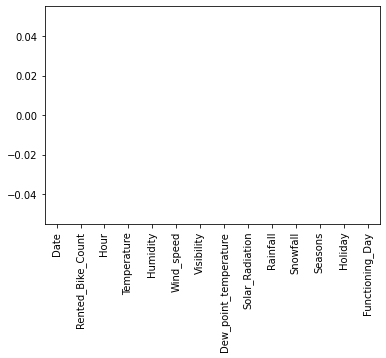

In [193]:
# Visualizing the missing values
missing_values.plot(kind='bar')
print("Here is no bar so here is no missing values ")

### What did you know about your dataset?

Our Dataset have no duplicate value and also there is no null values and missing values

## ***2. Understanding Your Variables***

In [194]:
# Dataset Columns
list(bsds.columns)

['Date',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning_Day']

In [195]:
# Convert format of date column

bsds['Date']=bsds['Date'].astype('datetime64[ns]')

In [196]:
# Dataset Describe

bsds.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

In [197]:
# Dataset Describe include all 
bsds.describe(include='all')

Date  Rented_Bike_Count         Hour  Temperature  \
count                  8760        8760.000000  8760.000000  8760.000000   
unique                  365                NaN          NaN          NaN   
top     2017-01-12 00:00:00                NaN          NaN          NaN   
freq                     24                NaN          NaN          NaN   
first   2017-01-12 00:00:00                NaN          NaN          NaN   
last    2018-12-11 00:00:00                NaN          NaN          NaN   
mean                    NaN         704.602055    11.500000    12.882922   
std                     NaN         644.997468     6.922582    11.944825   
min                     NaN           0.000000     0.000000   -17.800000   
25%                     NaN         191.000000     5.750000     3.500000   
50%                     NaN         504.500000    11.500000    13.700000   
75%                     NaN        1065.250000    17.250000    22.500000   
max                     NaN        3556.000000    23.000000    39.400000   

           Humidity   Wind_speed   Visibility  Dew_point_temperature  \
count   8760.000000  8760.000000  8760.000000            8760.000000   
unique          NaN          NaN          NaN                    NaN   
top             NaN          NaN          NaN                    NaN   
freq            NaN          NaN          NaN                    NaN   
first           NaN          NaN          NaN                    NaN   
last            NaN          NaN          NaN                    NaN   
mean      58.226256     1.724909  1436.825799               4.073813   
std       20.362413     1.036300   608.298712              13.060369   
min        0.000000     0.000000    27.000000             -30.600000   
25%       42.000000     0.900000   940.000000              -4.700000   
50%       57.000000     1.500000  1698.000000               5.100000   
75%       74.000000     2.300000  2000.000000              14.800000   
max       98.000000     7.400000  2000.000000              27.200000   

        Solar_Radiation     Rainfall     Snowfall Seasons     Holiday  \
count       8760.000000  8760.000000  8760.000000    8760        8760   
unique              NaN          NaN          NaN       4           2   
top                 NaN          NaN          NaN  Spring  No Holiday   
freq                NaN          NaN          NaN    2208        8328   
first               NaN          NaN          NaN     NaN         NaN   
last                NaN          NaN          NaN     NaN         NaN   
mean           0.569111     0.148687     0.075068     NaN         NaN   
std            0.868746     1.128193     0.436746     NaN         NaN   
min            0.000000     0.000000     0.000000     NaN         NaN   
25%            0.000000     0.000000     0.000000     NaN         NaN   
50%            0.010000     0.000000     0.000000     NaN         NaN   
75%            0.930000     0.000000     0.000000     NaN         NaN   
max            3.520000    35.000000     8.800000     NaN         NaN   

       Functioning_Day  
count             8760  
unique               2  
top                Yes  
freq              8465  
first              NaN  
last               NaN  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
max                NaN

In [198]:
# Numarical Columns

numarical_column=list(bsds.describe().columns)
numarical_column

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [199]:
# Categorical Columns

list_of_categorical_column=list(bsds.describe(include=['object']).columns)
list_of_categorical_column

['Seasons', 'Holiday', 'Functioning_Day']

### Check Unique Values for each variable.

In [200]:
# Check Unique Values for each variable.
for i in list_of_categorical_column:
  Unique_Values=bsds[i].unique()
  print(i,"=",Unique_Values)

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday = ['No Holiday' 'Holiday']
Functioning_Day = ['Yes' 'No']


## 3. ***Data Wrangling***

### Data Wrangling

In [201]:
# Target variable/Dependent Variable

y = bsds['Rented_Bike_Count']
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented_Bike_Count, Length: 8760, dtype: int64

In [202]:
# Adding month column

bsds['month']=bsds['Date'].dt.month
bsds.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
4759 2018-06-17                475     7         19.6        75         0.9   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
4759         884                   15.0             0.42       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  
4759  Summer  No Holiday             Yes      6

In [203]:
# Adding day column

bsds['day']=bsds['Date'].dt.day
bsds.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
1892 2018-02-17                145    20         -2.1        38         2.0   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
1892        2000                  -14.5              0.0       0.0       0.0   

     Seasons  Holiday Functioning_Day  month  day  
1892  Winter  Holiday             Yes      2   17

In [204]:
# Adding Day name column

bsds['day_name']=bsds['Date'].dt.day_name()
bsds.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
1031 2018-12-01                144    23         -6.7        36         1.3   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
1031        1821                  -19.3              0.0       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day  day_name  
1031  Winter  No Holiday             Yes     12    1  Saturday

In [205]:
# Adding weekeed column using lamda function

bsds['weekend']=bsds['day_name'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
bsds.sample()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
6714 2018-06-09               2497    18         25.8        58         2.9   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
6714        2000                   16.9             0.16       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day  day_name  weekend  
6714  Autumn  No Holiday             Yes      6    9  Saturday        1

In [206]:
bsds.sample(10)

Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
77   2017-04-12                 82     5          2.0        83         2.7   
6023 2018-08-08               1180    23         29.1        77         0.4   
1695 2018-09-02                315    15          5.0        24         1.0   
2517 2018-03-15                567    21         10.4        96         2.7   
4207 2018-05-25               1250     7         14.4        66         1.1   
2977 2018-04-04                113     1         14.8        96         1.7   
1442 2018-01-30                 84     2        -10.6        40         1.0   
3289 2018-04-17                421     1          9.0        36         1.0   
7897 2018-10-26                629     1         12.7        56         1.2   
2317 2018-07-03                509    13          9.9        39         1.9   

      Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
77           253                   -0.5             0.00       0.0       0.0   
6023        1552                   24.6             0.00       0.0       0.0   
1695        1037                  -13.9             1.16       0.0       0.0   
2517         499                    9.7             0.00       0.0       0.0   
4207         704                    8.1             0.42       0.0       0.0   
2977         209                   14.1             0.00       0.0       0.0   
1442        2000                  -21.6             0.00       0.0       0.0   
3289        1994                   -5.3             0.00       0.0       0.0   
7897        1952                    4.1             0.00       0.0       0.0   
2317        1911                   -3.4             1.61       0.0       0.0   

     Seasons     Holiday Functioning_Day  month  day   day_name  weekend  
77    Winter  No Holiday             Yes      4   12  Wednesday        0  
6023  Summer  No Holiday             Yes      8    8  Wednesday        0  
1695  Winter  No Holiday             Yes      9    2     Sunday        1  
2517  Spring  No Holiday             Yes      3   15   Thursday        0  
4207  Spring  No Holiday             Yes      5   25     Friday        0  
2977  Spring  No Holiday             Yes      4    4  Wednesday        0  
1442  Winter  No Holiday             Yes      1   30    Tuesday        0  
3289  Spring  No Holiday             Yes      4   17    Tuesday        0  
7897  Autumn  No Holiday             Yes     10   26     Friday        0  
2317  Spring  No Holiday             Yes      7    3    Tuesday        0

In [207]:
# Drop Date column

bsds=bsds.drop(['Date'], axis=1)
bsds

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8755               1003    19          4.2        34         2.6        1894   
8756                764    20          3.4        37         2.3        2000   
8757                694    21          2.6        39         0.3        1968   
8758                712    22          2.1        41         1.0        1859   
8759                584    23          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         Holiday Functioning_Day  month  day  day_name  weekend  
0     No Holiday             Yes      1   12  Thursday        0  
1     No Holiday             Yes      1   12  Thursday        0  
2     No Holiday             Yes      1   12  Thursday        0  
3     No Holiday             Yes      1   12  Thursday        0  
4     No Holiday             Yes      1   12  Thursday        0  
...          ...             ...    ...  ...       ...      ...  
8755  No Holiday             Yes     11   30    Friday        0  
8756  No Holiday             Yes     11   30    Friday        0  
8757  No Holiday             Yes     11   30    Friday        0  
8758  No Holiday             Yes     11   30    Friday        0  
8759  No Holiday             Yes     11   30    Friday        0  

[8760 rows x 17 columns]

In [208]:
# Independent Variables 

x=bsds.drop(['Rented_Bike_Count'], axis=1)
x

Hour  Temperature  Humidity  Wind_speed  Visibility  \
0        0         -5.2        37         2.2        2000   
1        1         -5.5        38         0.8        2000   
2        2         -6.0        39         1.0        2000   
3        3         -6.2        40         0.9        2000   
4        4         -6.0        36         2.3        2000   
...    ...          ...       ...         ...         ...   
8755    19          4.2        34         2.6        1894   
8756    20          3.4        37         2.3        2000   
8757    21          2.6        39         0.3        1968   
8758    22          2.1        41         1.0        1859   
8759    23          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                     -17.6              0.0       0.0       0.0  Winter   
1                     -17.6              0.0       0.0       0.0  Winter   
2                     -17.7              0.0       0.0       0.0  Winter   
3                     -17.6              0.0       0.0       0.0  Winter   
4                     -18.6              0.0       0.0       0.0  Winter   
...                     ...              ...       ...       ...     ...   
8755                  -10.3              0.0       0.0       0.0  Autumn   
8756                   -9.9              0.0       0.0       0.0  Autumn   
8757                   -9.9              0.0       0.0       0.0  Autumn   
8758                   -9.8              0.0       0.0       0.0  Autumn   
8759                   -9.3              0.0       0.0       0.0  Autumn   

         Holiday Functioning_Day  month  day  day_name  weekend  
0     No Holiday             Yes      1   12  Thursday        0  
1     No Holiday             Yes      1   12  Thursday        0  
2     No Holiday             Yes      1   12  Thursday        0  
3     No Holiday             Yes      1   12  Thursday        0  
4     No Holiday             Yes      1   12  Thursday        0  
...          ...             ...    ...  ...       ...      ...  
8755  No Holiday             Yes     11   30    Friday        0  
8756  No Holiday             Yes     11   30    Friday        0  
8757  No Holiday             Yes     11   30    Friday        0  
8758  No Holiday             Yes     11   30    Friday        0  
8759  No Holiday             Yes     11   30    Friday        0  

[8760 rows x 16 columns]

In [209]:
# updated numarical columns

numarical_columns=list(bsds.describe().columns)
numarical_columns

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'month',
 'day',
 'weekend']

In [210]:
# updated categorical columns

list_of_categorical_columns=list(bsds.describe(include=['object']).columns)
list_of_categorical_columns

['Seasons', 'Holiday', 'Functioning_Day', 'day_name']

In [211]:
# unique values of categorical columns

for i in list_of_categorical_columns:
  un=bsds[i].unique()
  print(i,"=",un)

Seasons = ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday = ['No Holiday' 'Holiday']
Functioning_Day = ['Yes' 'No']
day_name = ['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday']


### What all manipulations have you done and insights you found?

In this dataset there are 8760 rows and columns 14.In which 3 columns categorical and remaining are numarical 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Checking Outliers and univariate analysis on numarical columns

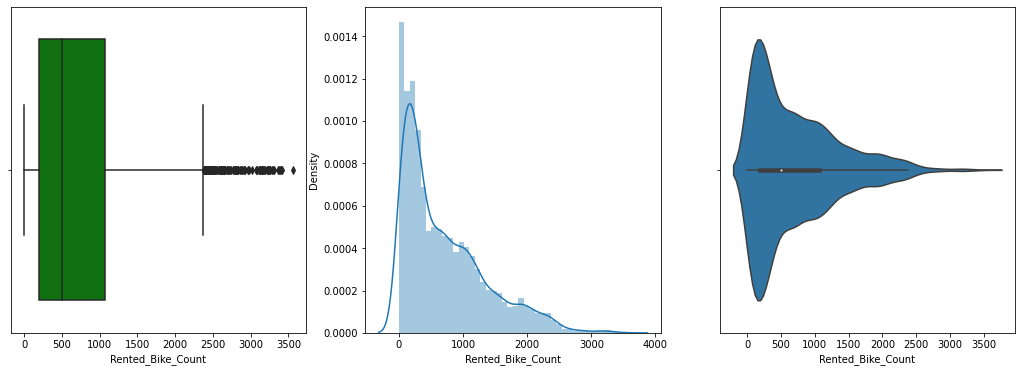

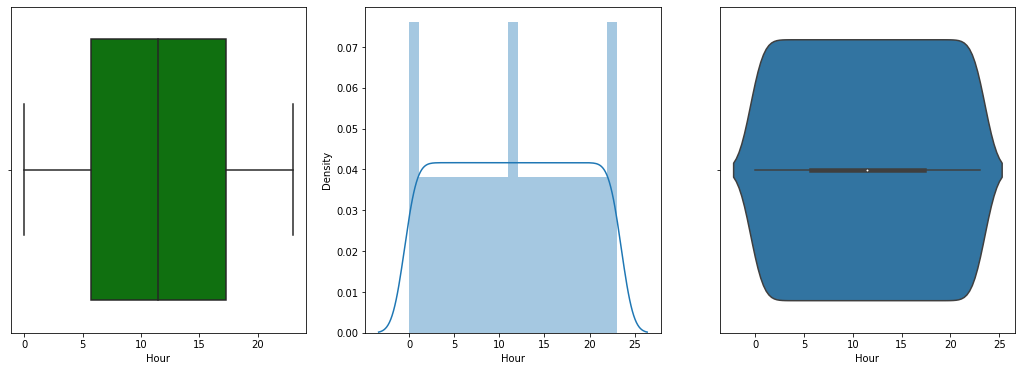

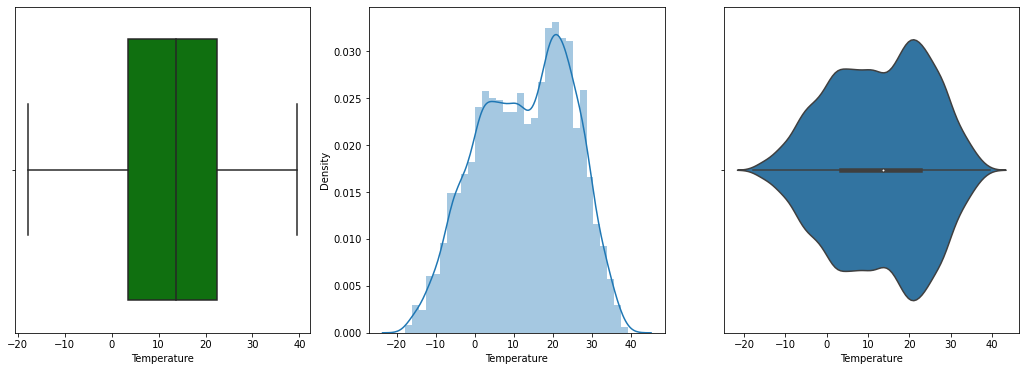

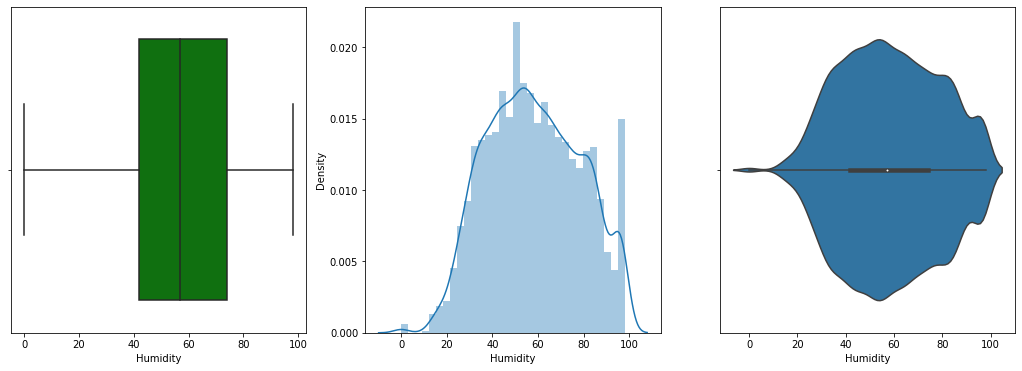

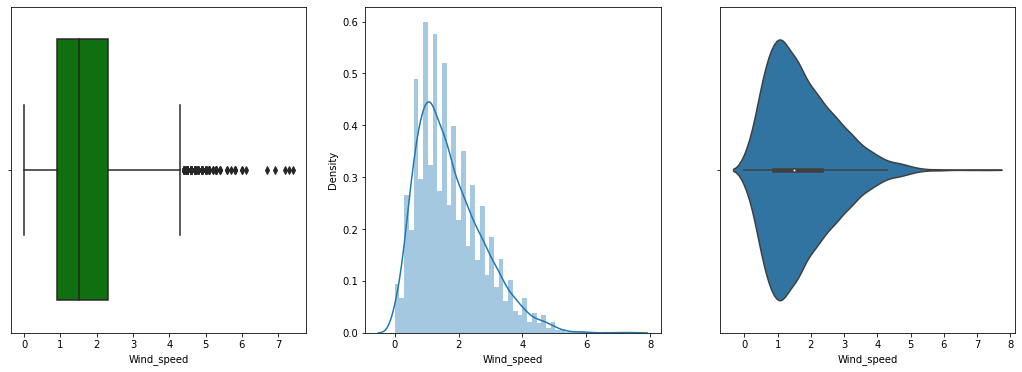

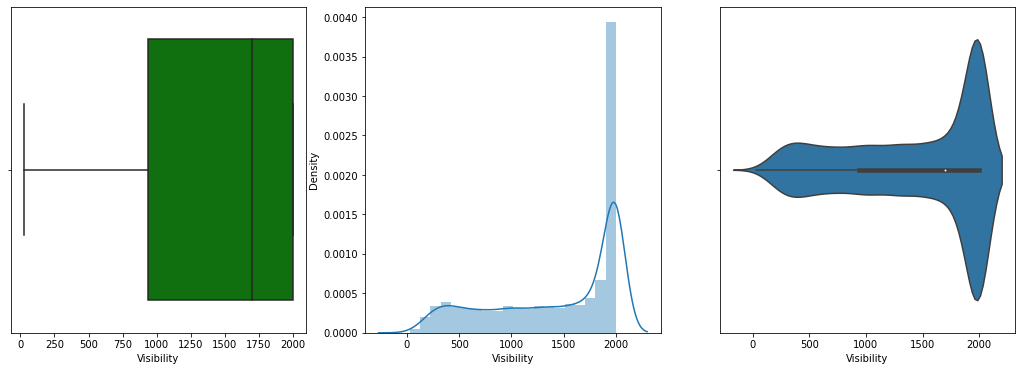

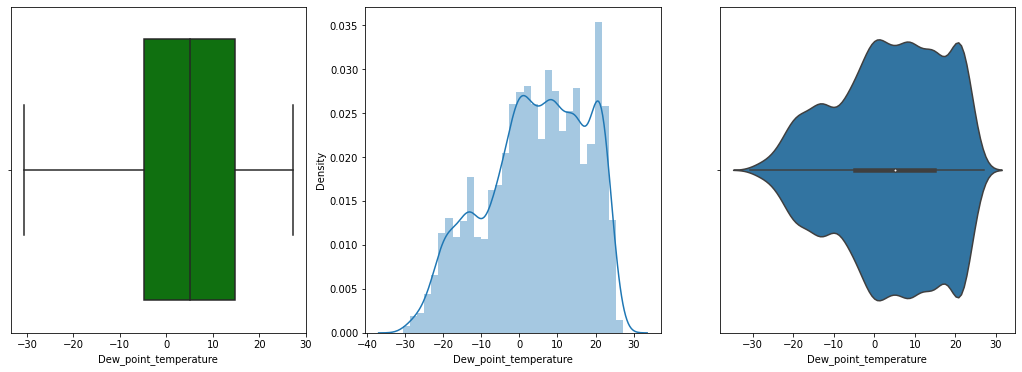

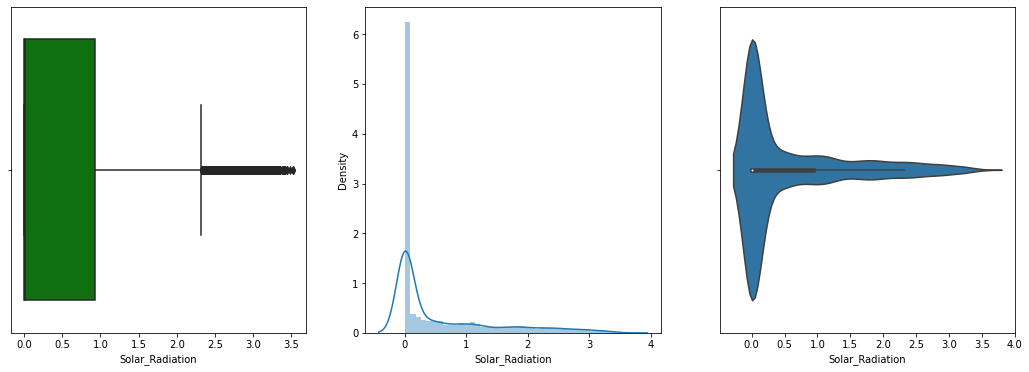

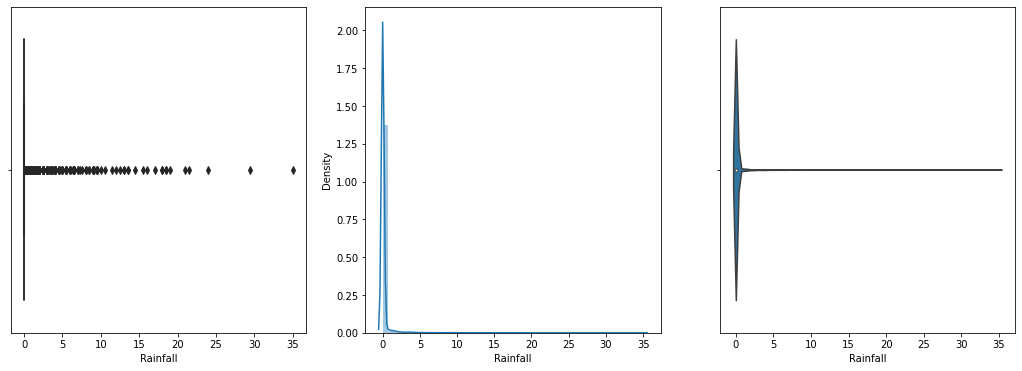

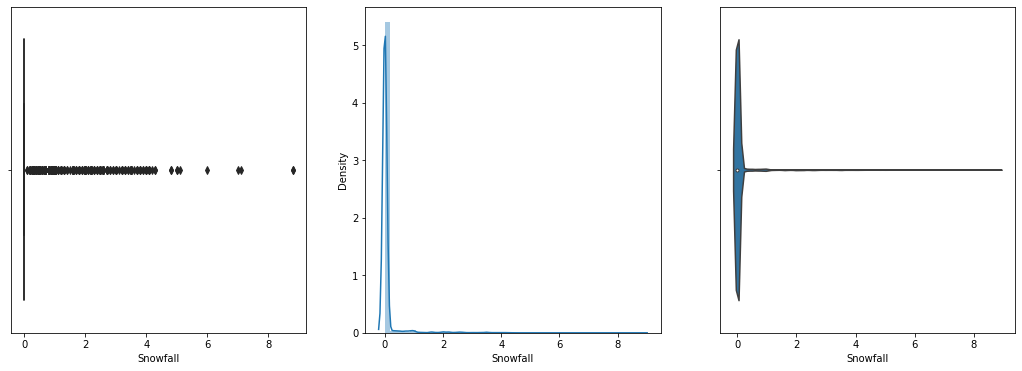

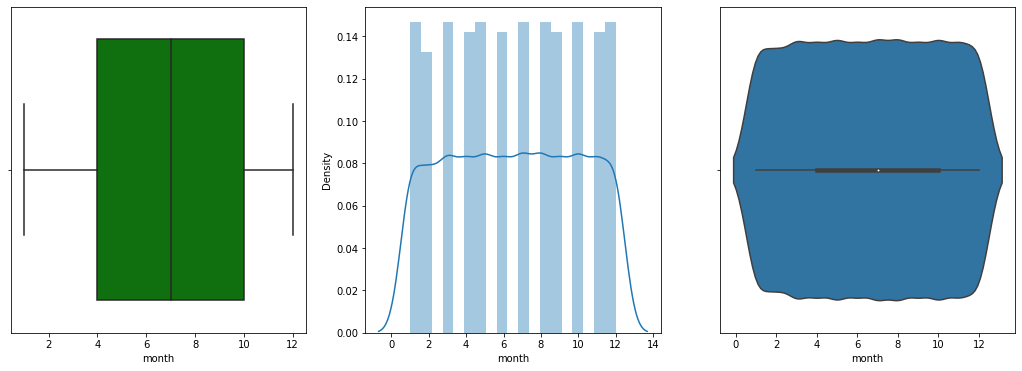

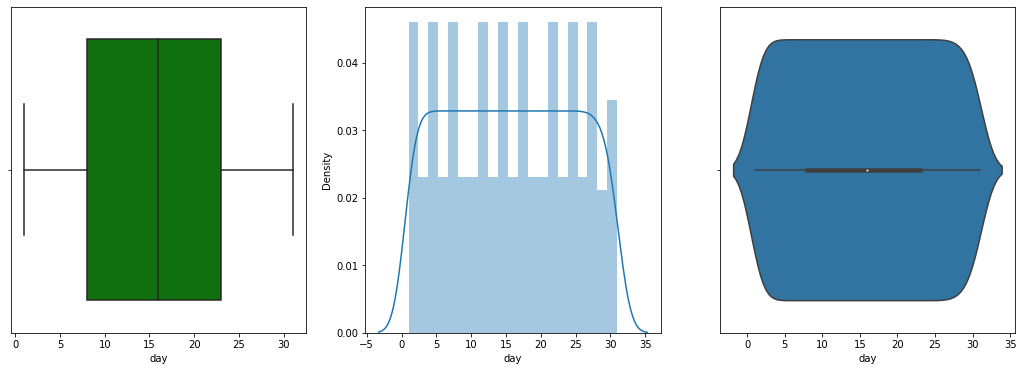

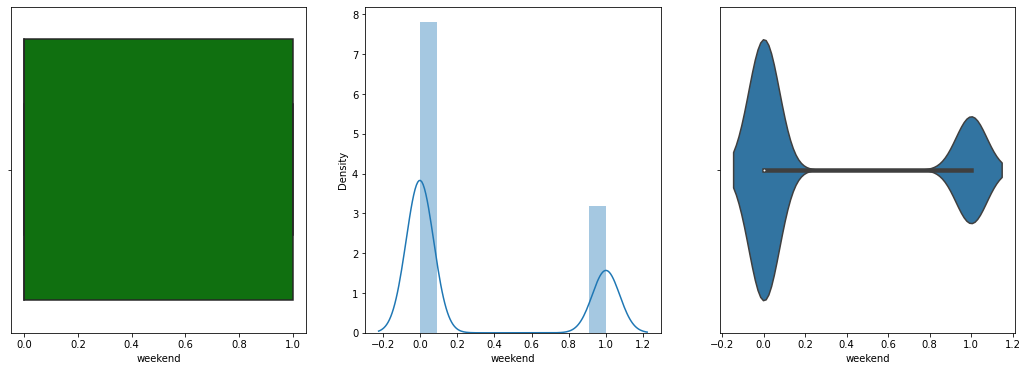

In [212]:
# checking outliers using three plots

for i in numarical_columns:
 fig = plt.figure(figsize=(18, 6))
 plt.subplot(1,3,1)
 sns.boxplot(bsds[i],color='green')
 plt.subplot(1,3,2)
 sns.distplot(bsds[i])
 plt.subplot(1,3,3)
 sns.violinplot(bsds[i])
 plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Univariate Analysis with mean and median of datset

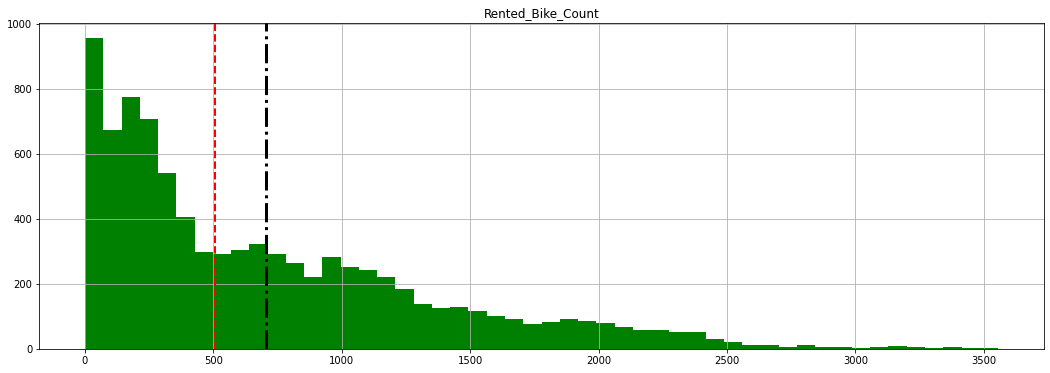

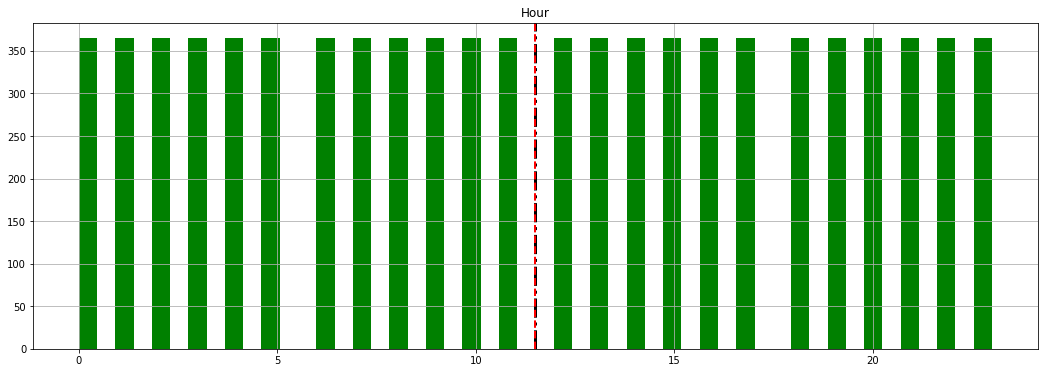

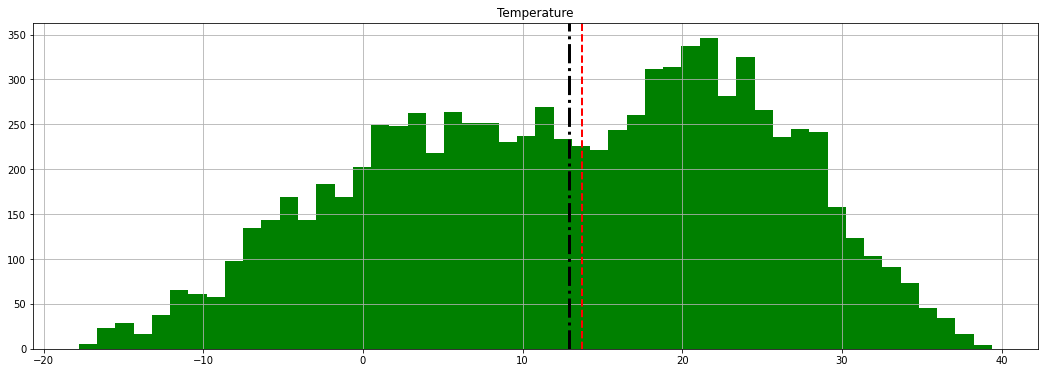

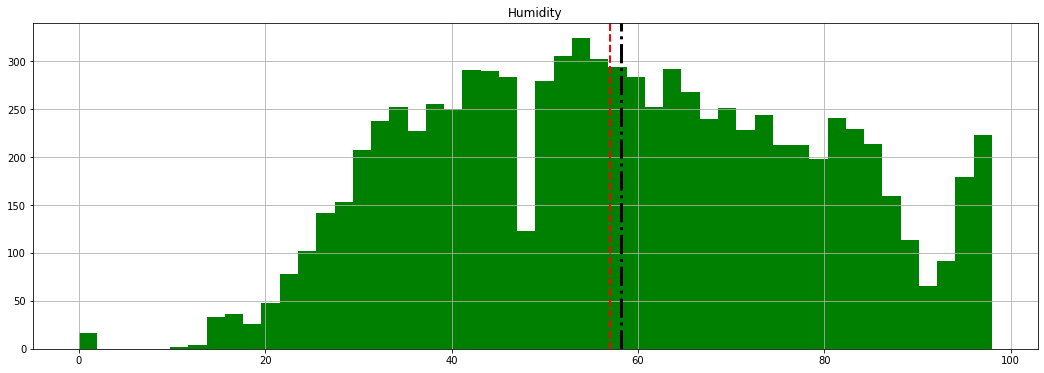

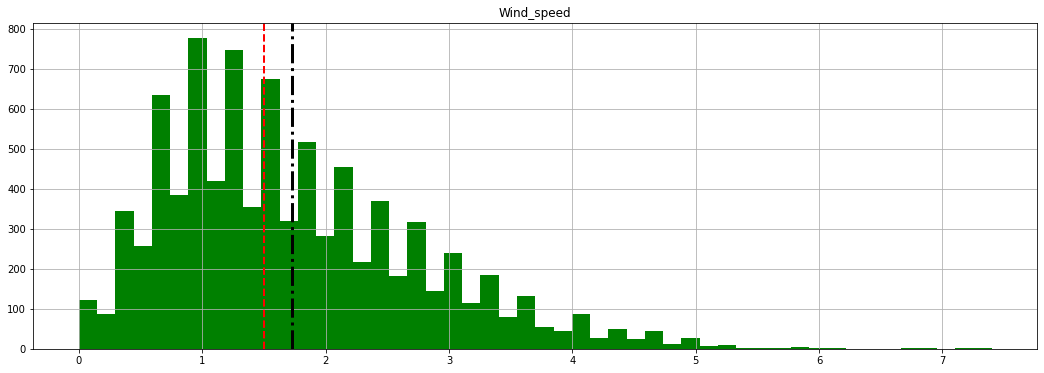

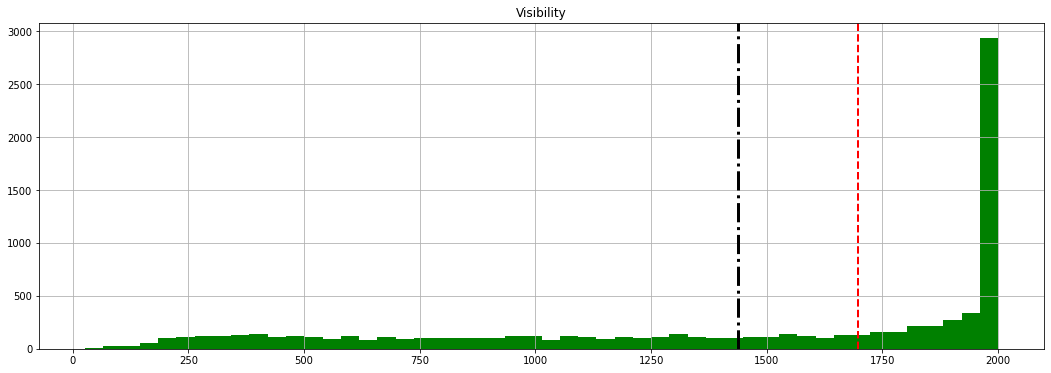

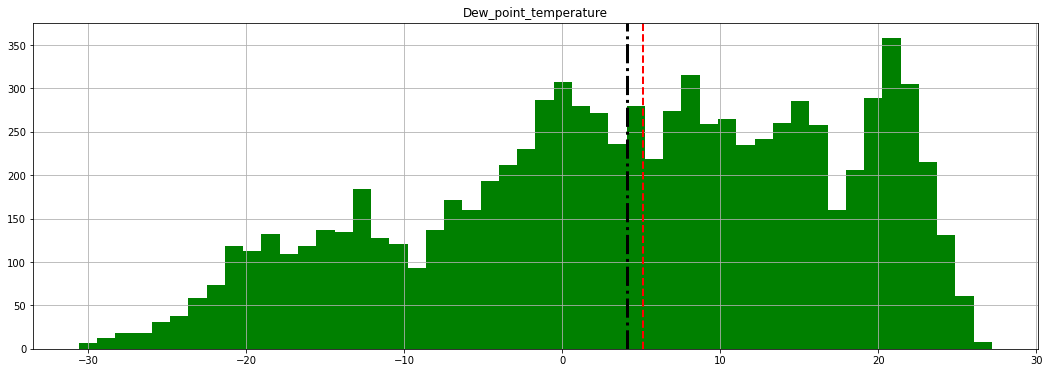

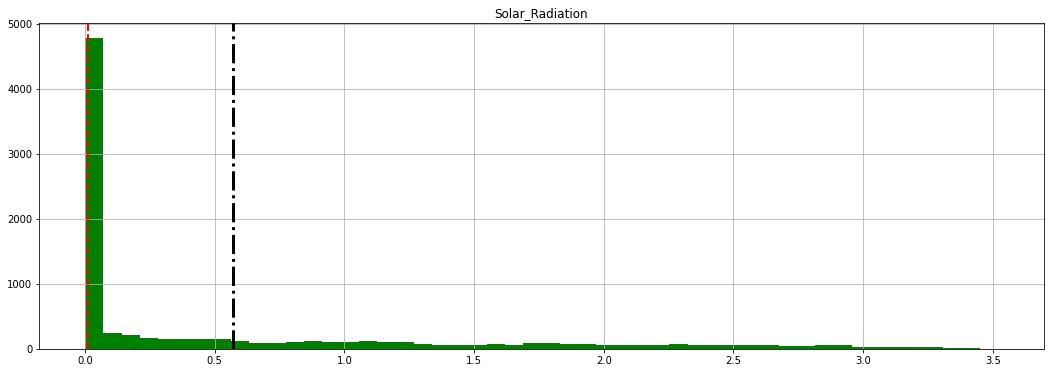

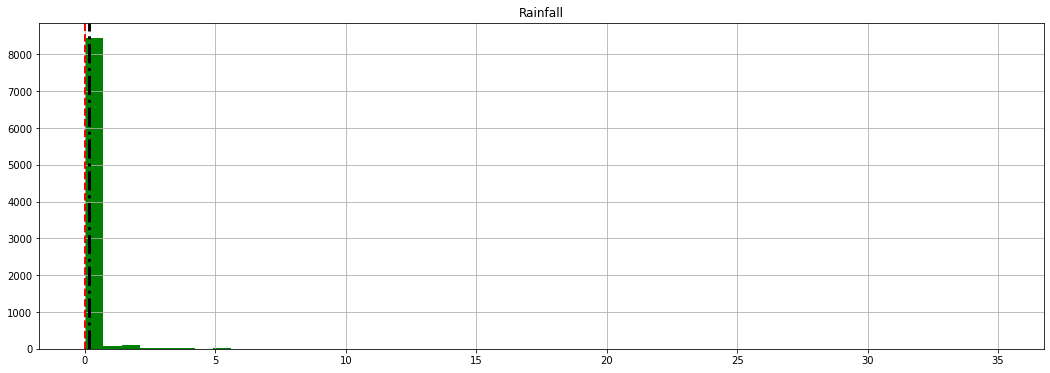

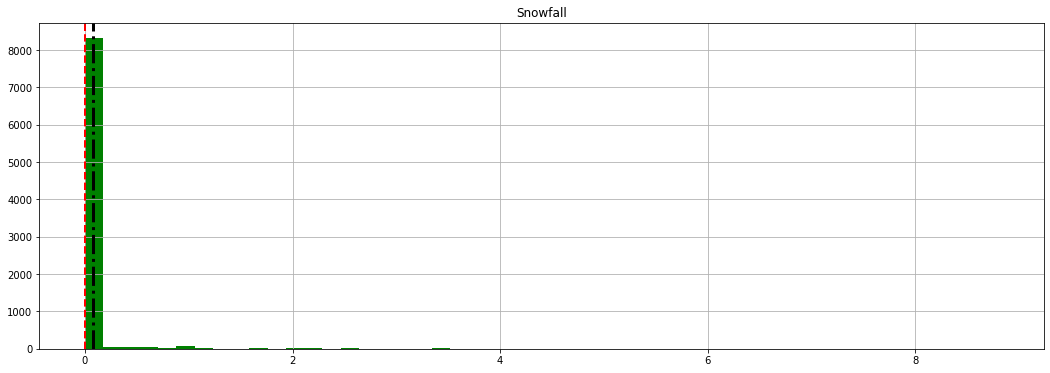

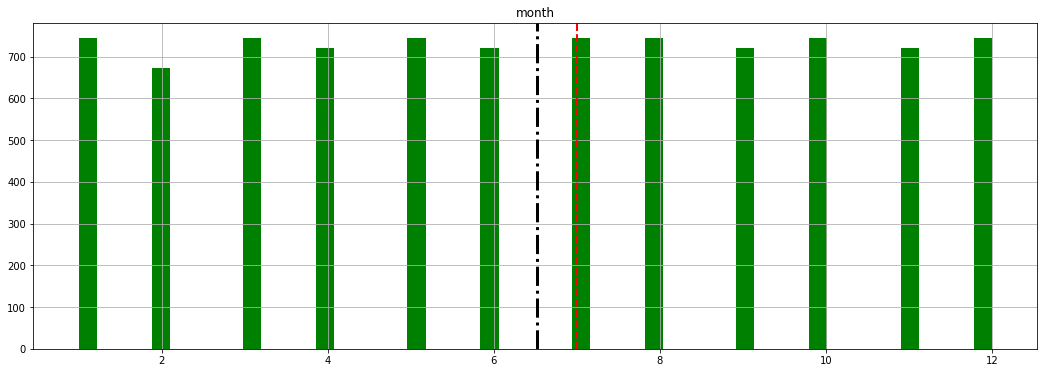

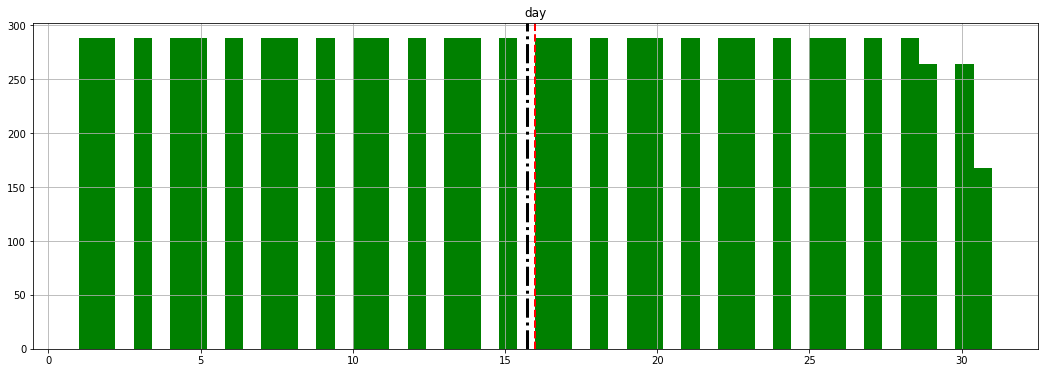

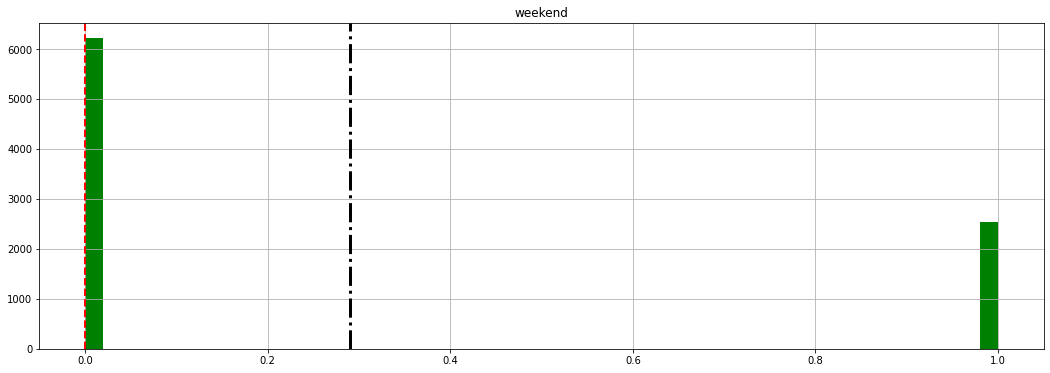

In [213]:
for i in numarical_columns:
    fig = plt.figure(figsize=(18, 6))
    ax = fig.gca()
    feature = bsds[i]
    feature.hist(bins=50, ax = ax,color='green')
    ax.axvline(feature.mean(), color='black', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='red', linestyle='dashed', linewidth=2)    
    ax.set_title(i)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Univariate Analysis on categorical columns

In [214]:
# check for value count on categorical columns

for i in list_of_categorical_columns:
  a=bsds[i].value_counts()
  print(a)

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning_Day, dtype: int64
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_name, dtype: int64


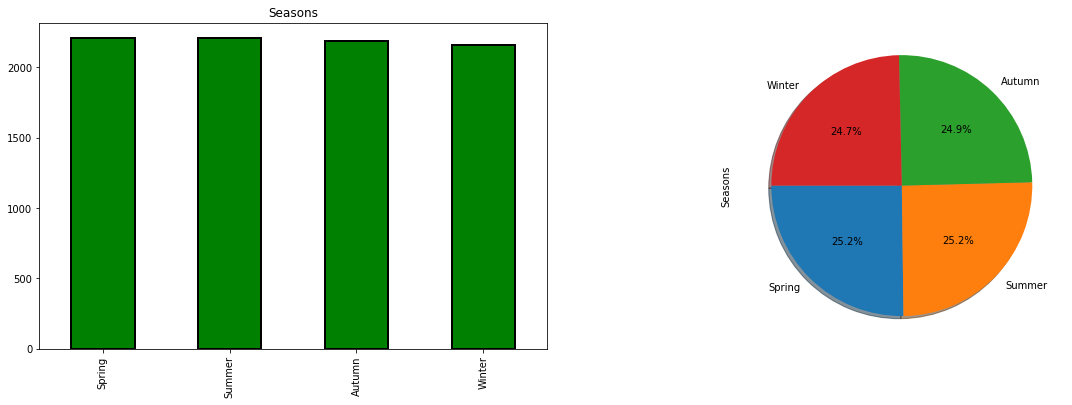

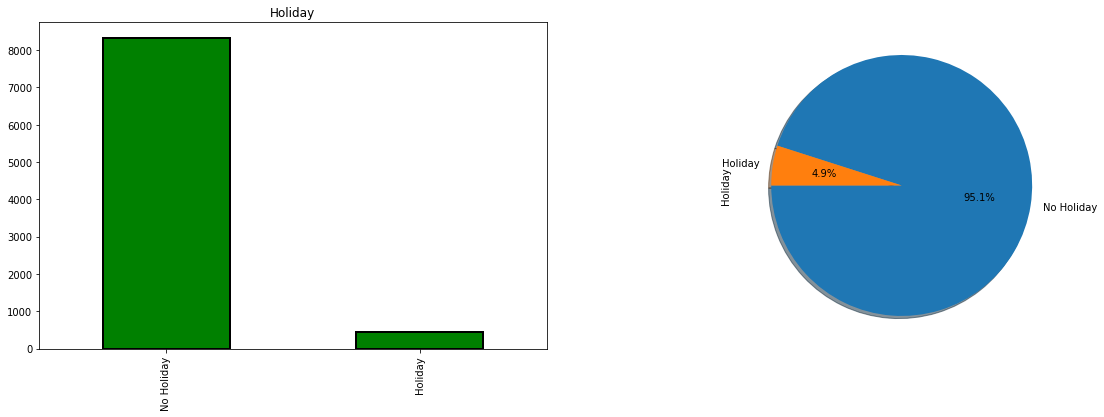

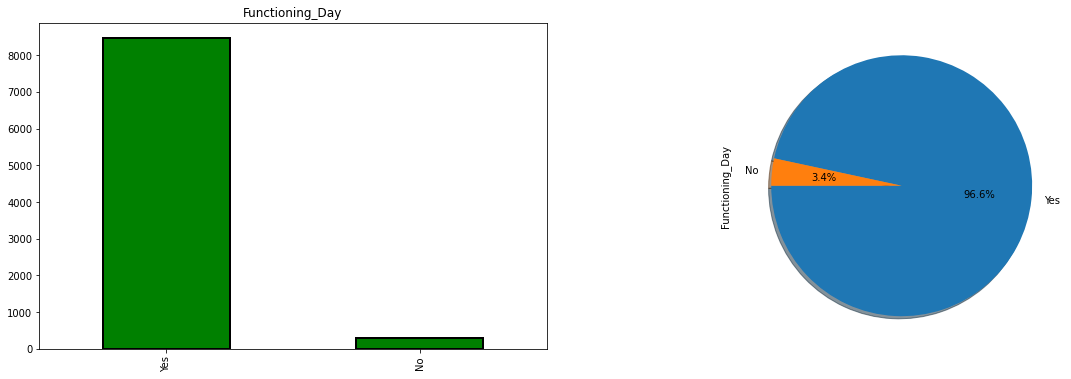

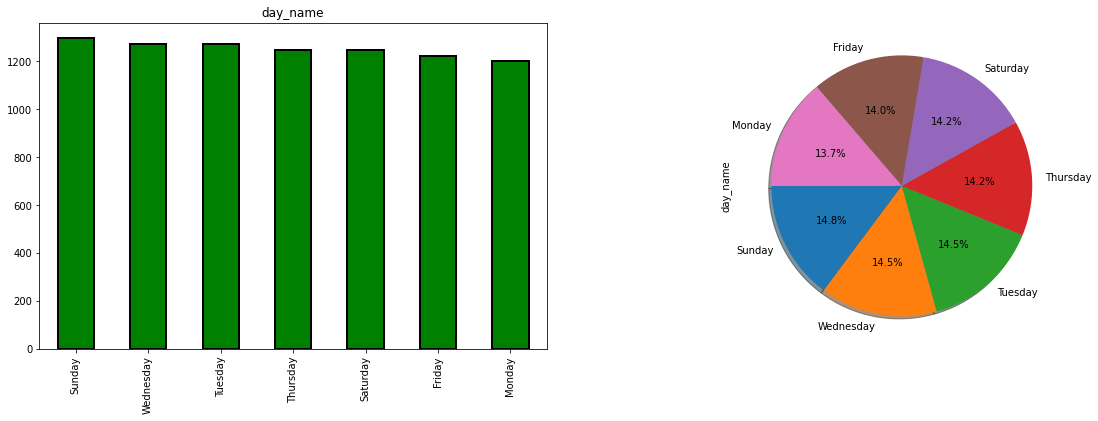

In [215]:
# bar plot and pie chart seprately for categorical data count

for i in list_of_categorical_columns:
 fig = plt.figure(figsize=(20, 6))
 plt.subplot(1,2,1)
 bsds[i].value_counts().plot(kind='bar',color='green',edgecolor='black',linewidth=2)
 plt.title(i)
 plt.subplot(1,2,2)
 bsds[i].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,startangle=180)
 plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Target variable distribution

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Count'>

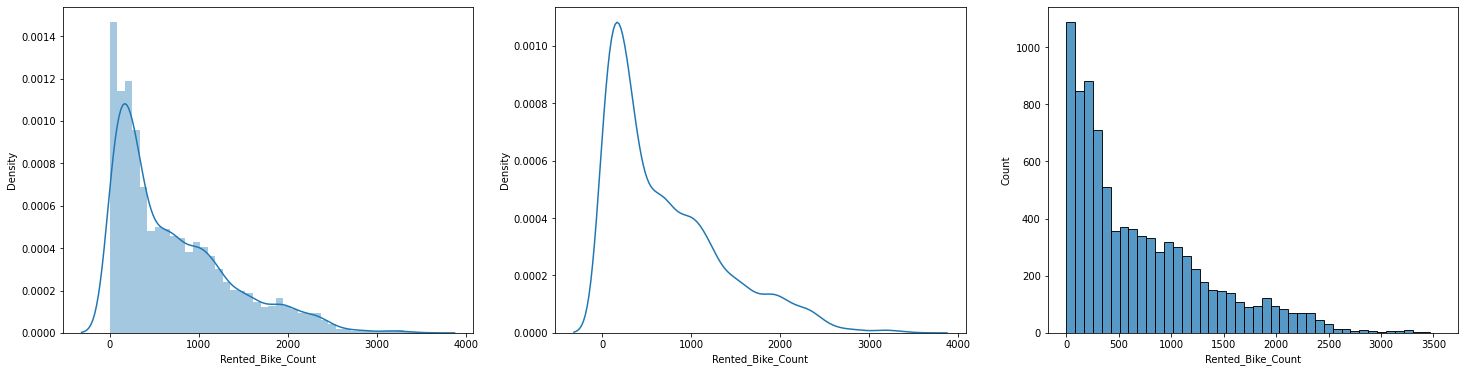

In [216]:
# Target variable distribution using distplot

fig = plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
sns.distplot(bsds['Rented_Bike_Count'])
plt.subplot(1,3,2)
sns.kdeplot(bsds['Rented_Bike_Count'])
plt.subplot(1,3,3)
sns.histplot(bsds['Rented_Bike_Count'])

<AxesSubplot:xlabel='Rented_Bike_Count'>

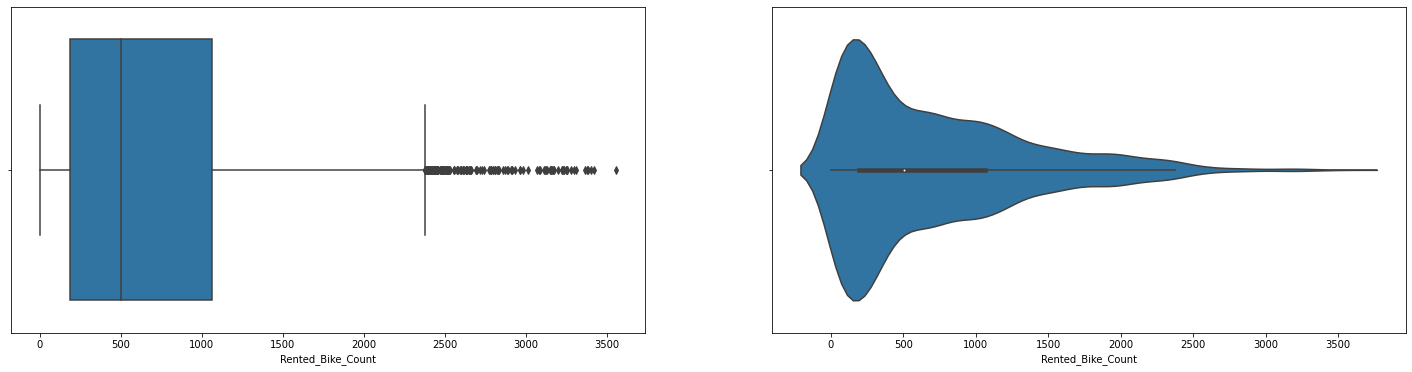

In [217]:
# box plot and violin plot on target variable

fig = plt.figure(figsize=(25, 6))
plt.subplot(1,2,1)
sns.boxplot(bsds['Rented_Bike_Count'])
plt.subplot(1,2,2)
sns.violinplot(bsds['Rented_Bike_Count'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Bivariate Analysis on categorical column with target column

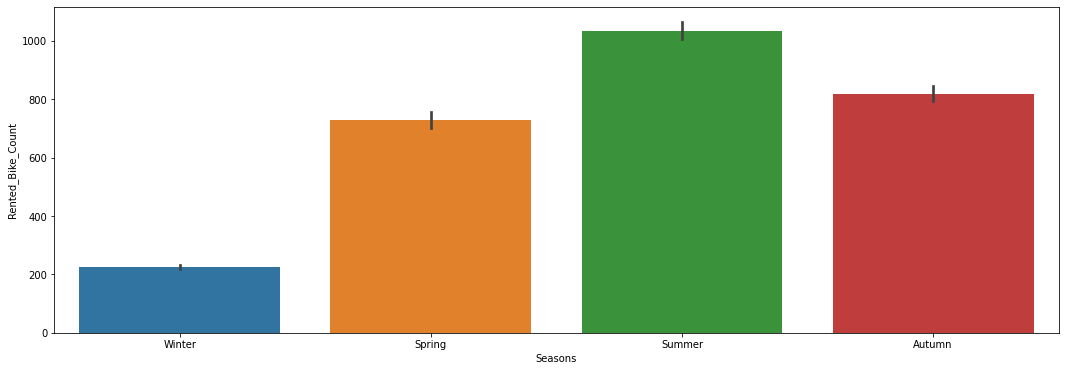

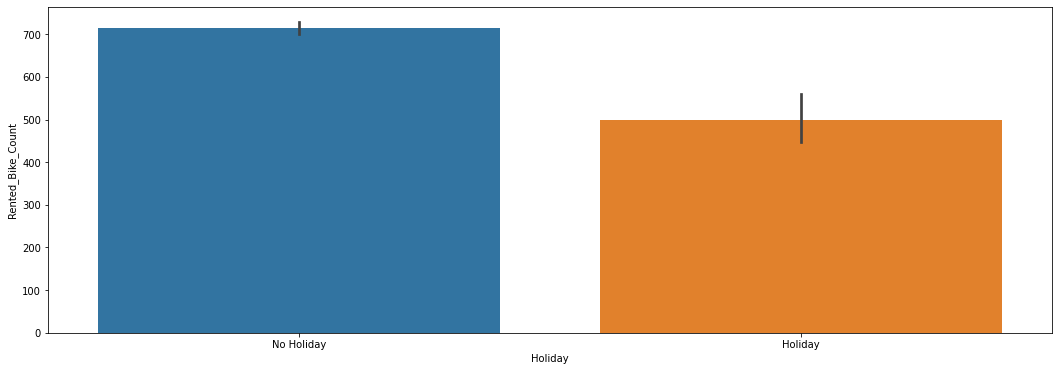

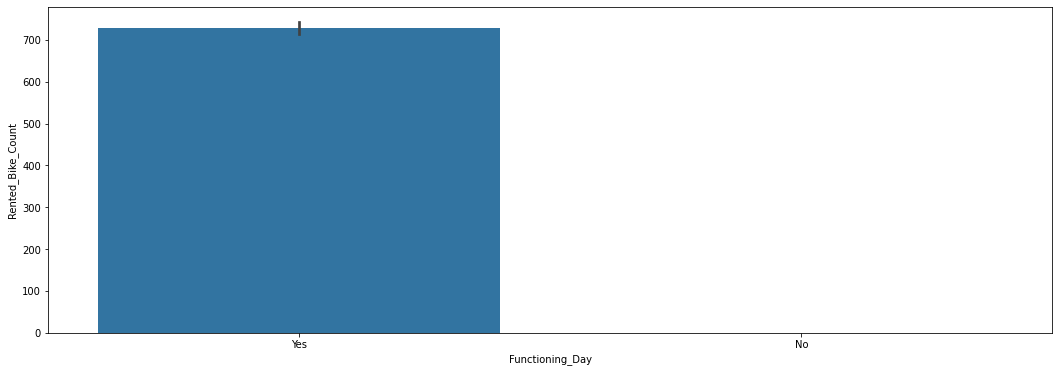

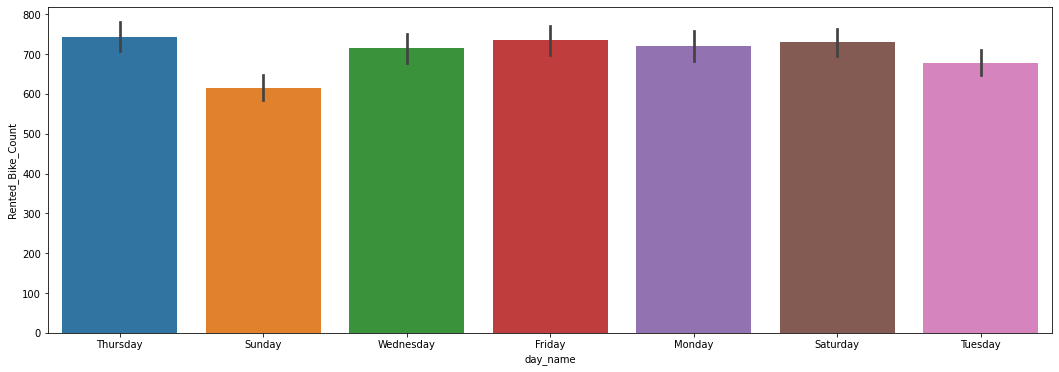

In [218]:
# Bivariate analysis of rente bike counts with each categorical column using bar graph

for i in list_of_categorical_columns:
  fig = plt.figure(figsize=(18, 6))
  sns.barplot(y=bsds['Rented_Bike_Count'],x=bsds[i])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Bivariate Analysis of numarical columns with target variable

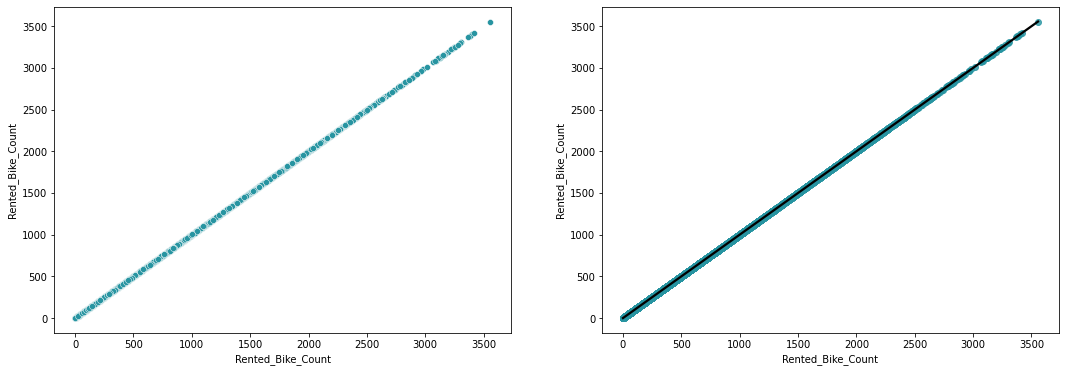

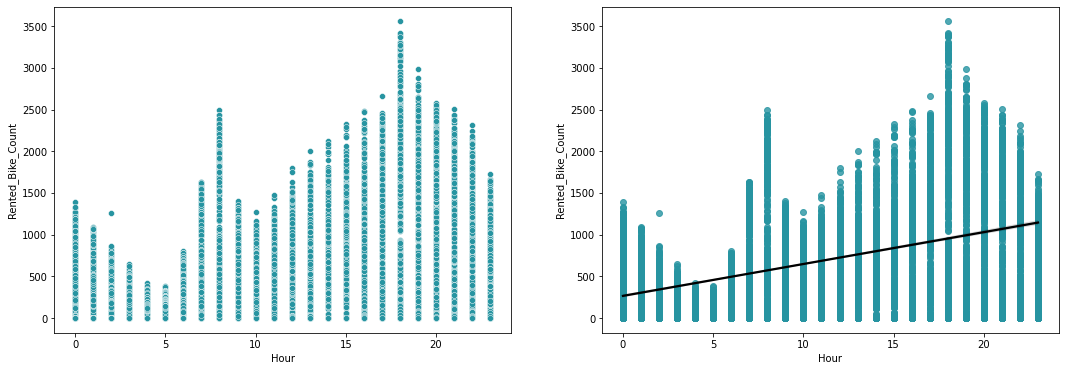

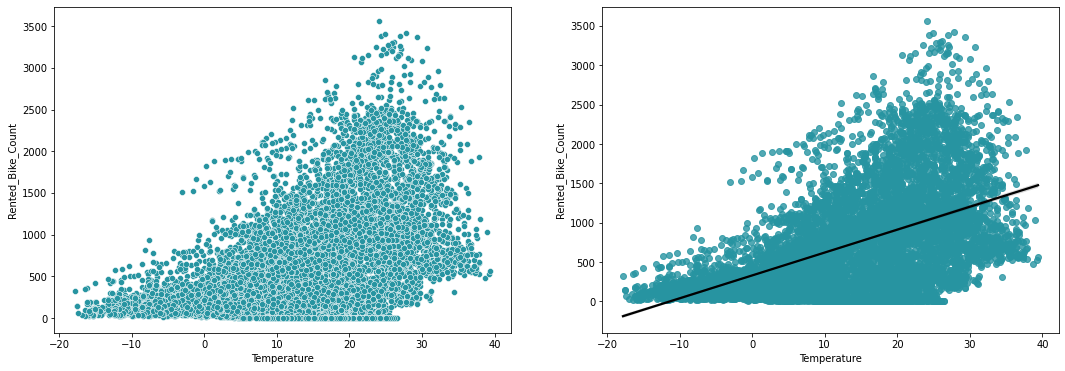

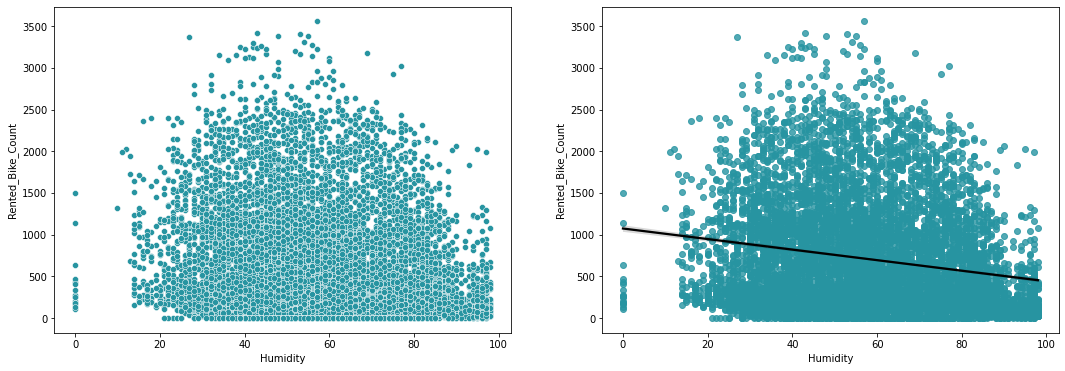

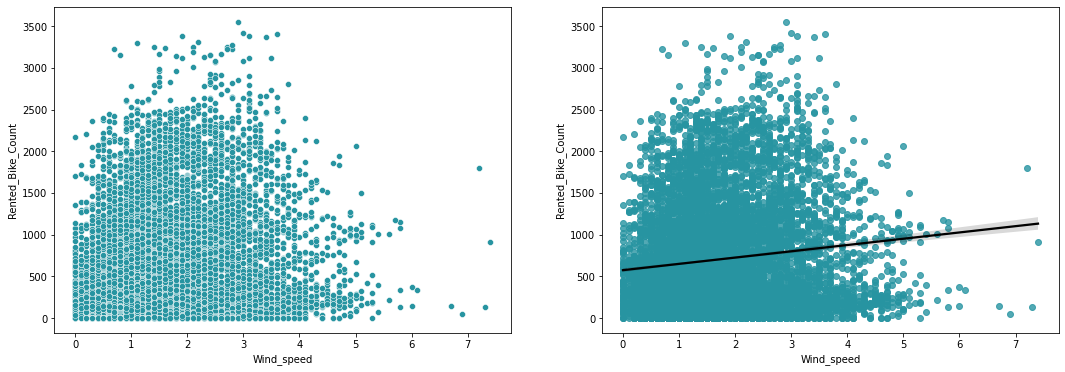

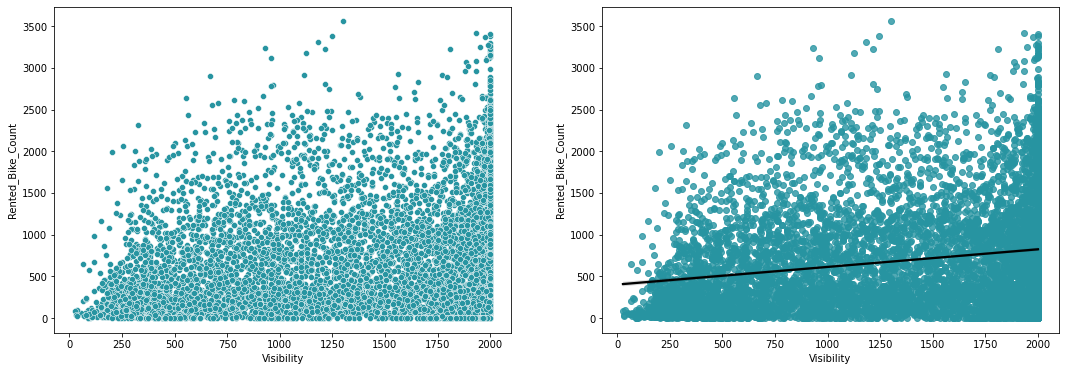

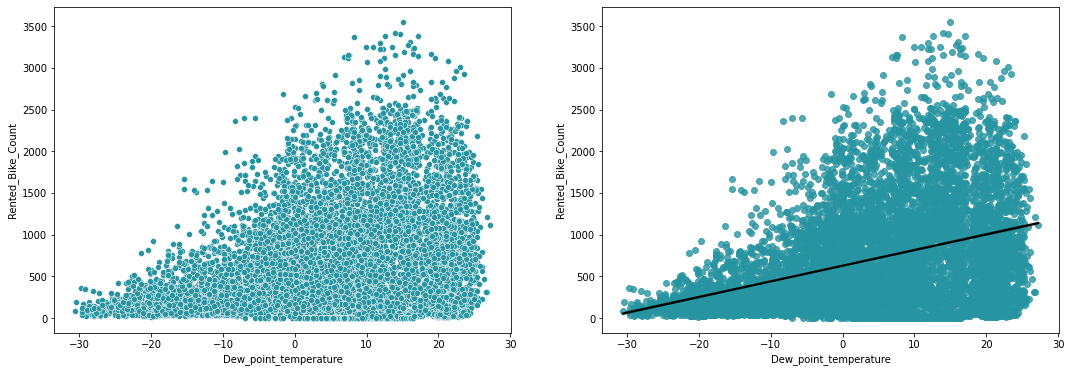

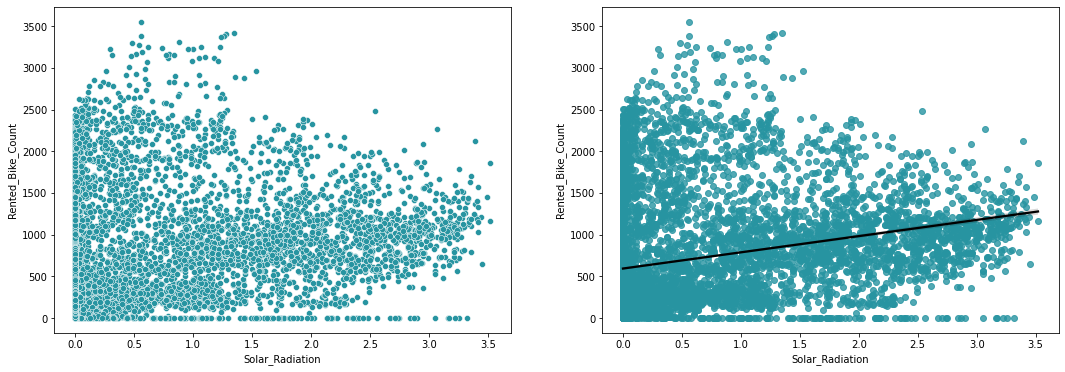

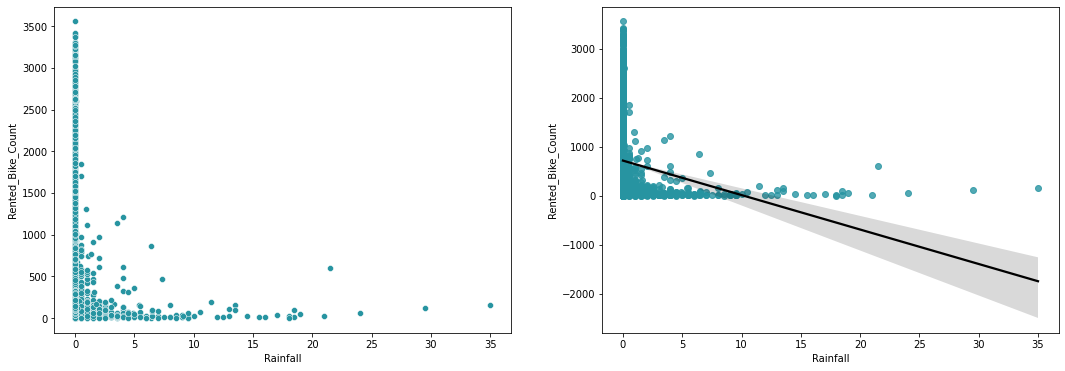

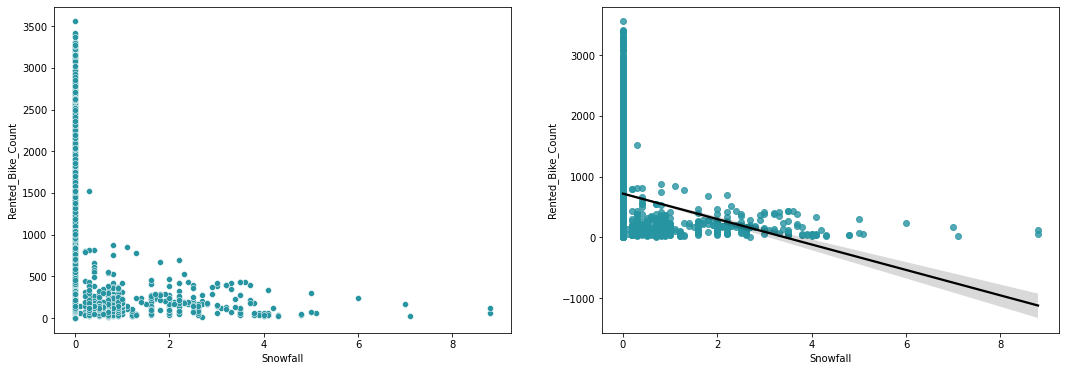

In [219]:
# Bivariate analysis on numarical columns with scatter plot and regression plot

for i in numarical_column:
 fig = plt.figure(figsize=(18, 6))
 plt.subplot(1,2,1)
 sns.scatterplot(y=bsds['Rented_Bike_Count'],x=bsds[i],color='#2794a1')
 plt.subplot(1,2,2)
 sns.regplot(x=bsds[i],y=bsds['Rented_Bike_Count'],scatter_kws={'color':'#2794a1'},line_kws={'color':'black'})
 plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 Multivariate Analysis

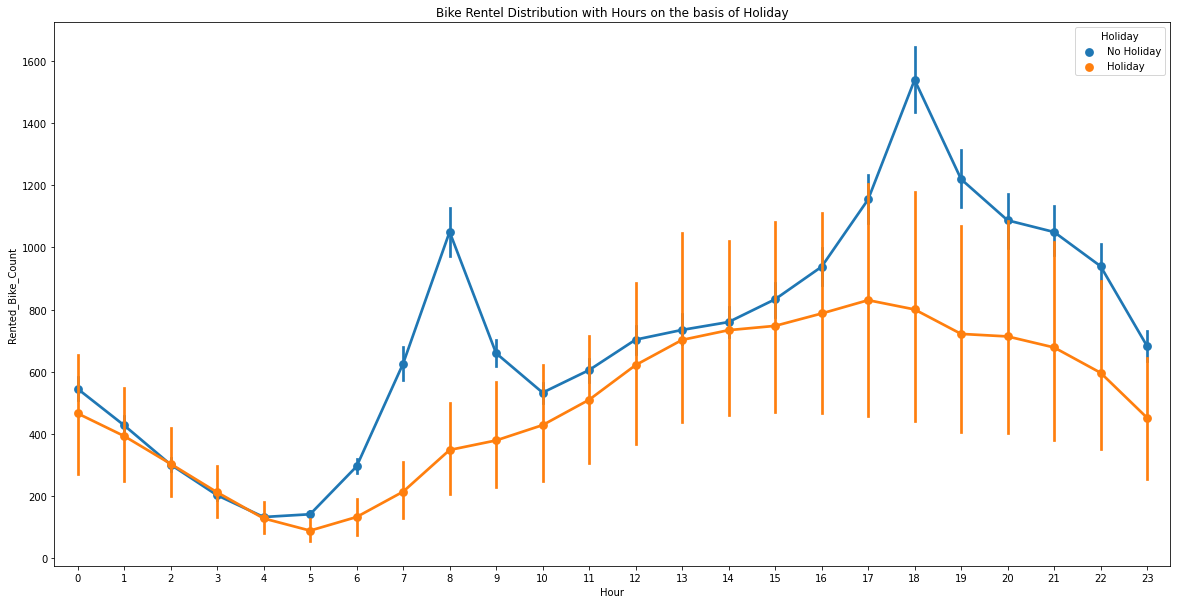

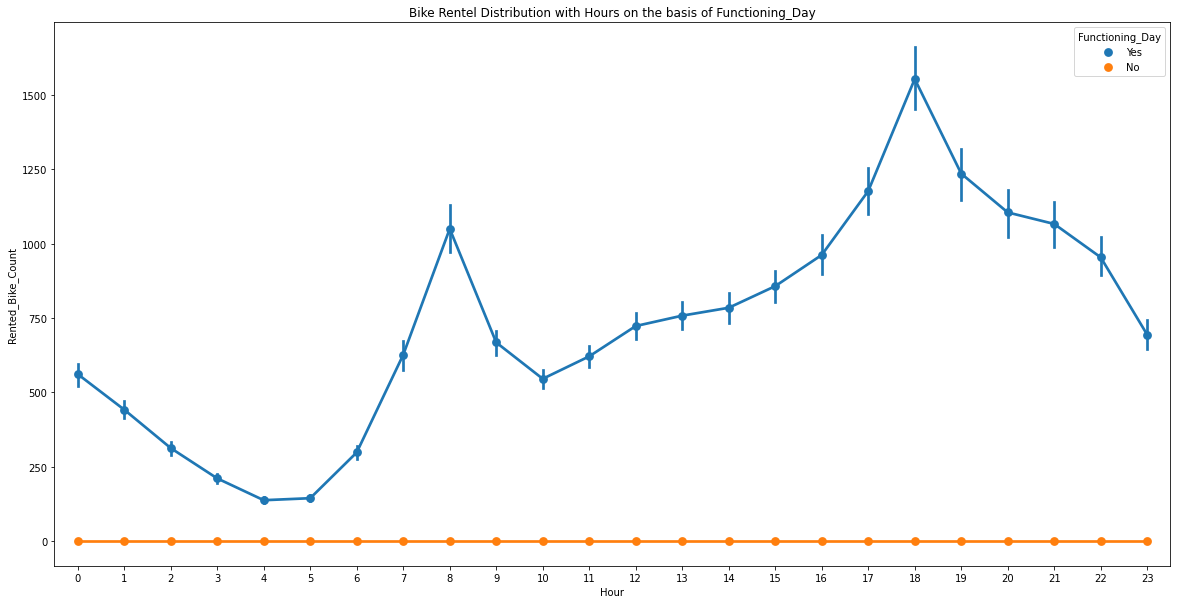

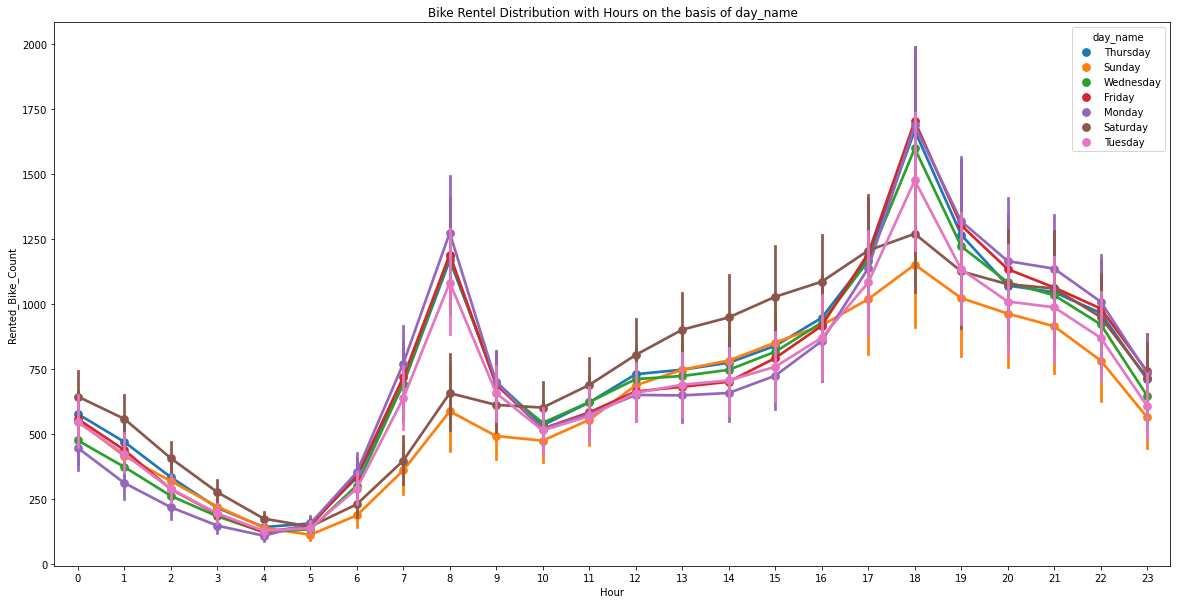

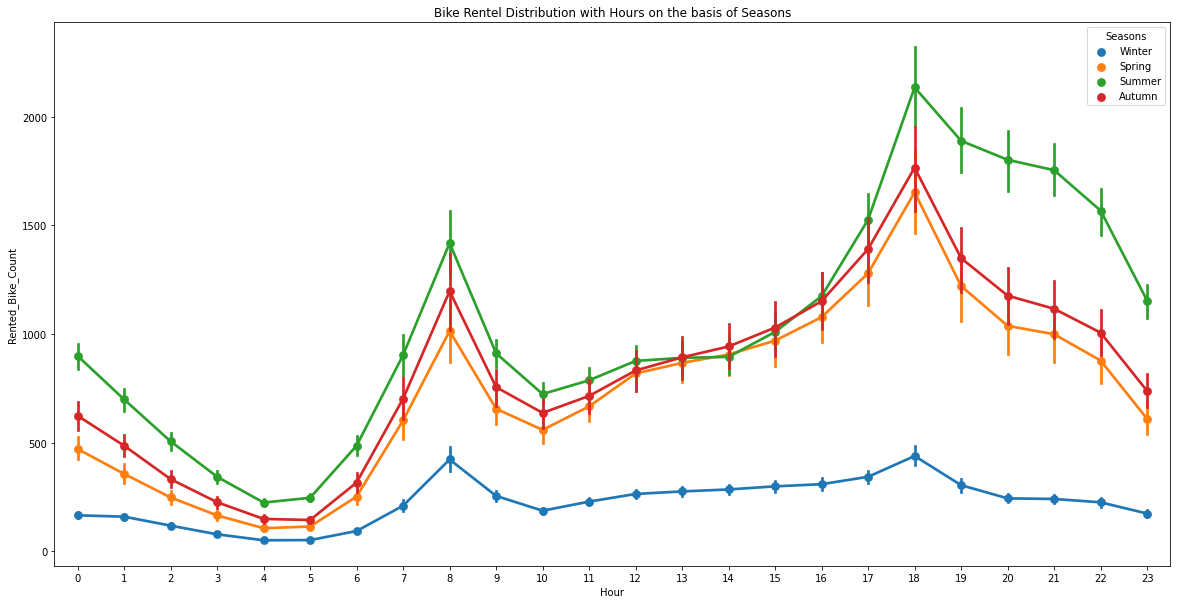

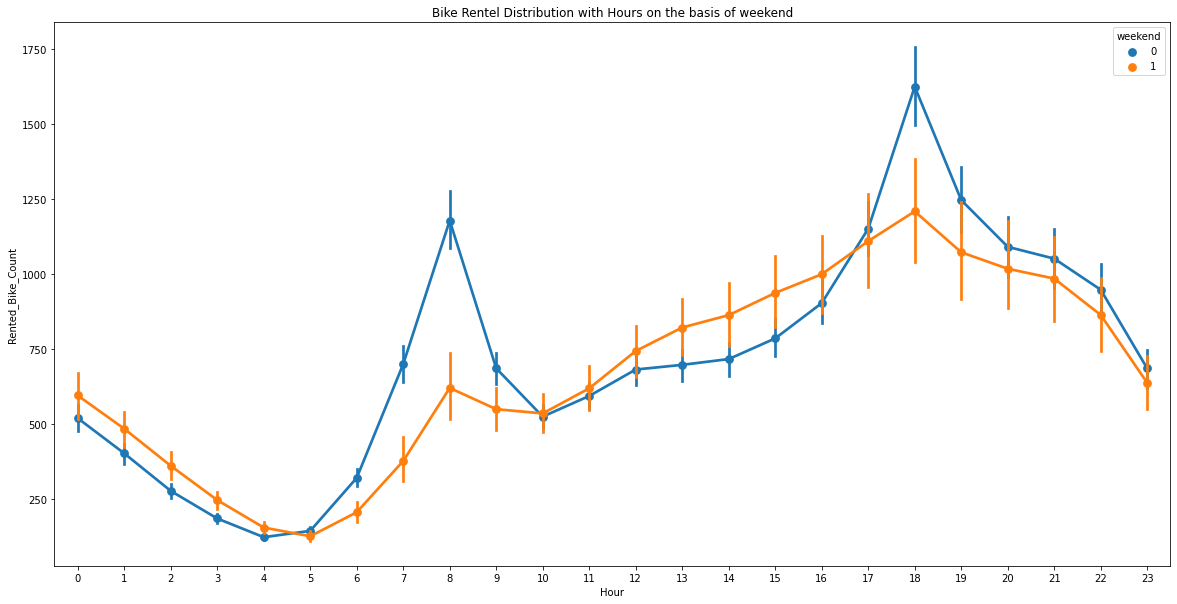

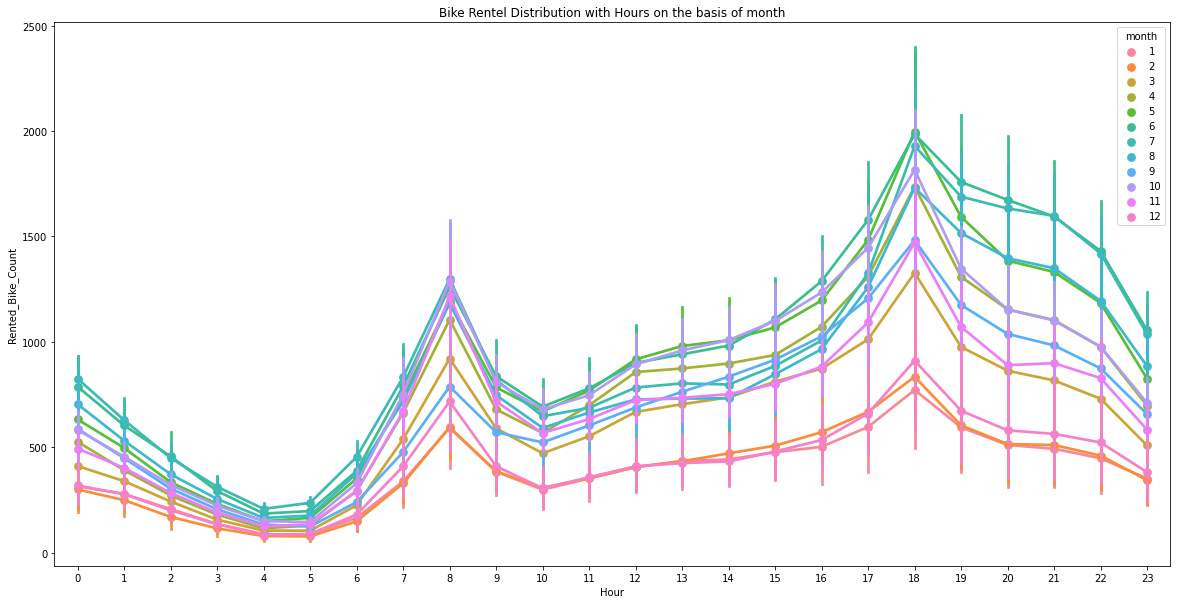

In [220]:
# check the maltivariate analysis using point plot

hue_list=['Holiday', 'Functioning_Day','day_name','Seasons', 'weekend', 'month']
for i in hue_list:
 plt.figure(figsize=(20,10))
 sns.pointplot(x=bsds['Hour'],y=bsds['Rented_Bike_Count'],hue=bsds[i])
 plt.title(f"Bike Rentel Distribution with Hours on the basis of {i}")
 plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Target variable normalization

<AxesSubplot:xlabel='Rented_Bike_Count'>

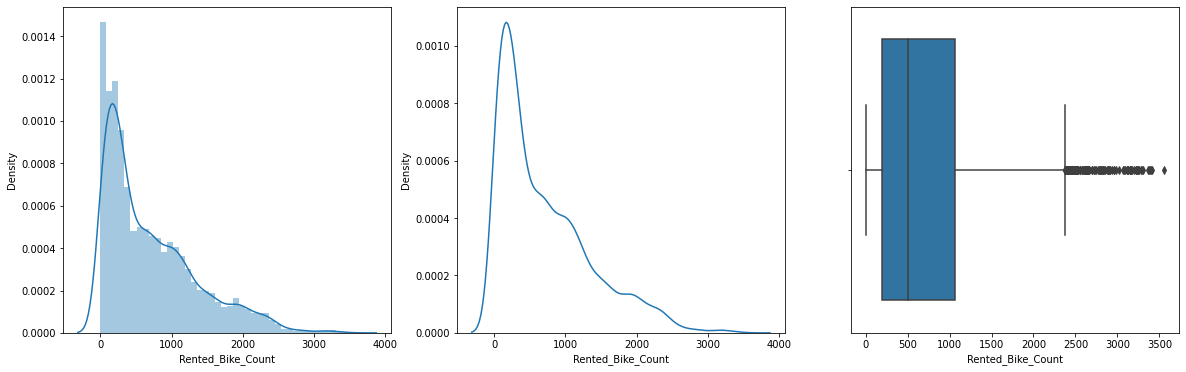

In [221]:
# check the distribution first

fig = plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(bsds['Rented_Bike_Count'])
plt.subplot(1,3,2)
sns.kdeplot(bsds['Rented_Bike_Count'])
plt.subplot(1,3,3)
sns.boxplot(bsds['Rented_Bike_Count'])

In [222]:
# Apply sqrt transformations on target variable because this is moderate right skewed

transformed_target_variable=np.sqrt(bsds['Rented_Bike_Count'])

<AxesSubplot:xlabel='Rented_Bike_Count'>

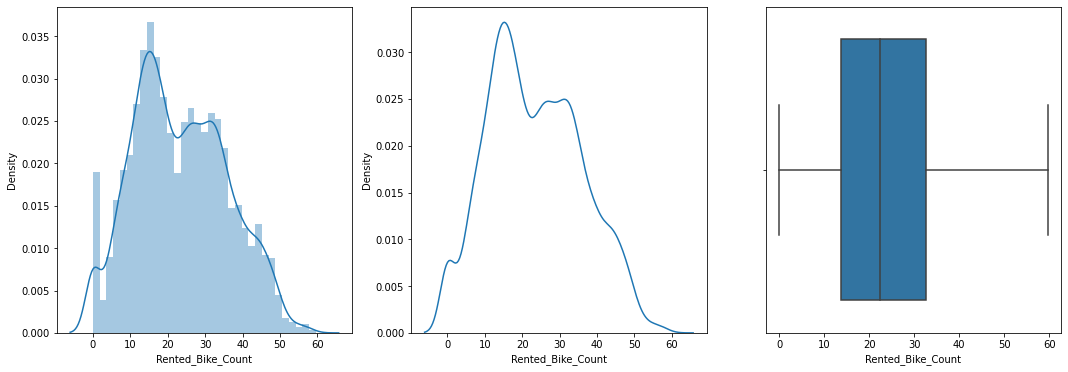

In [223]:
# Apply sqrt transformations on target variable because this is moderate right skewed

fig = plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.distplot(transformed_target_variable)
plt.subplot(1,3,2)
sns.kdeplot(transformed_target_variable)
plt.subplot(1,3,3)
sns.boxplot(transformed_target_variable)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 Nornalizing the numarical feature with sqrt tranform

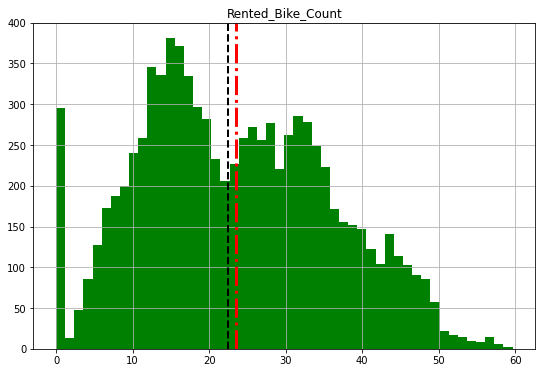

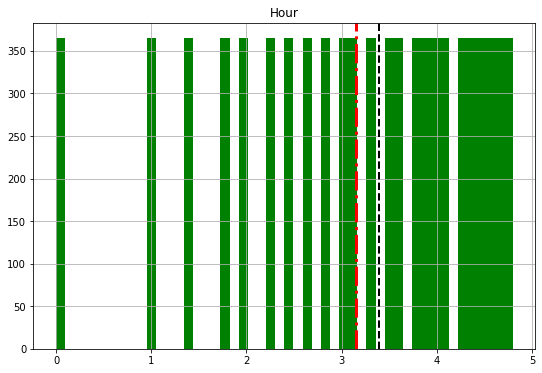

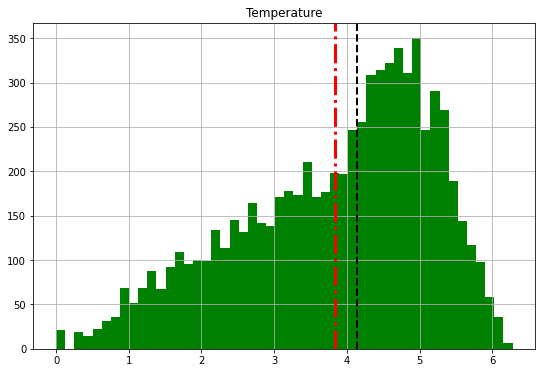

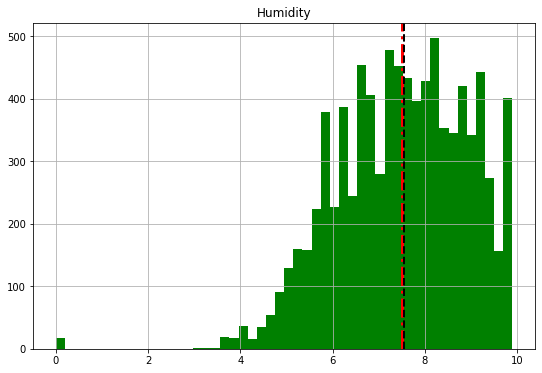

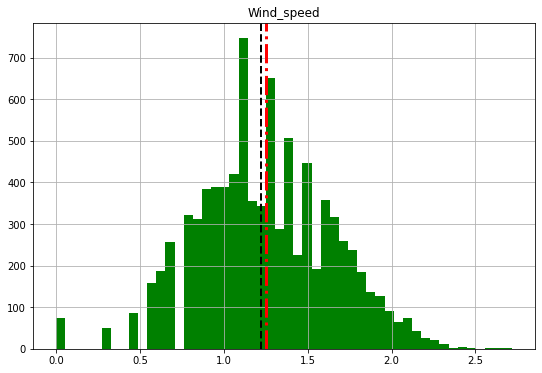

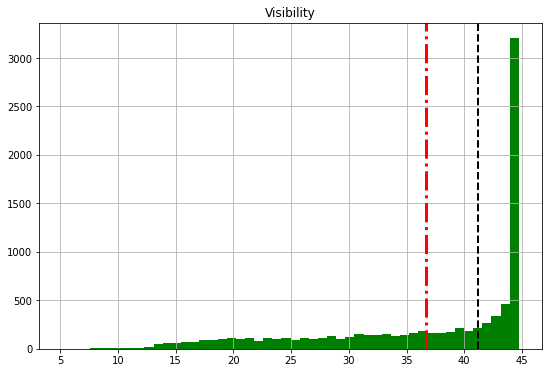

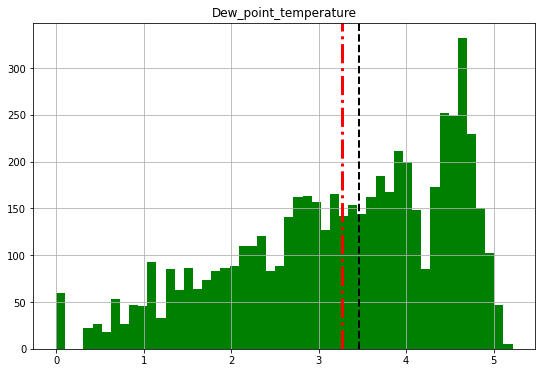

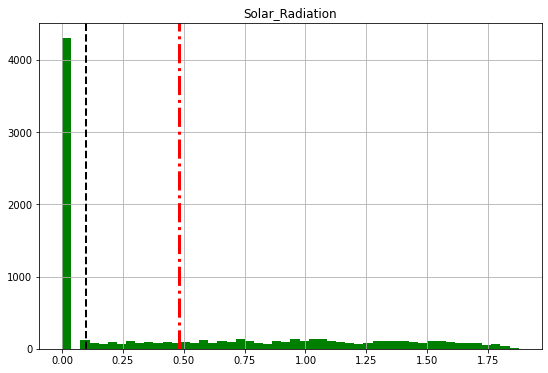

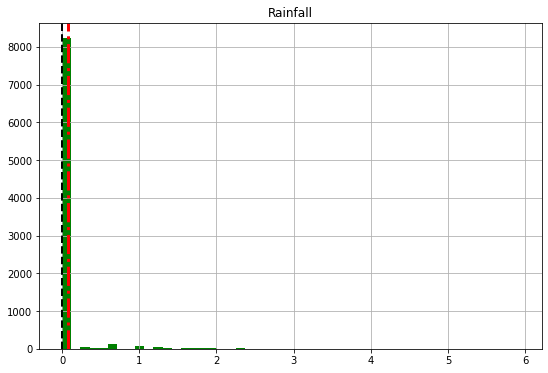

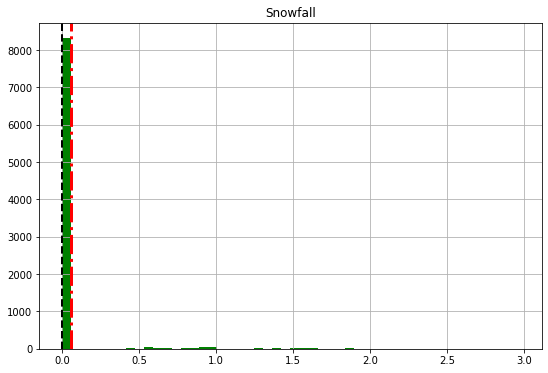

In [224]:
# Normalize the numarical featue using square root of the values

for col in numarical_column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bsds[col])
    feature.hist(bins=50, ax = ax,color='green')
    ax.axvline(feature.mean(), color='red', linestyle='dashdot', linewidth=3)
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Correlation Heatmap

<AxesSubplot:>

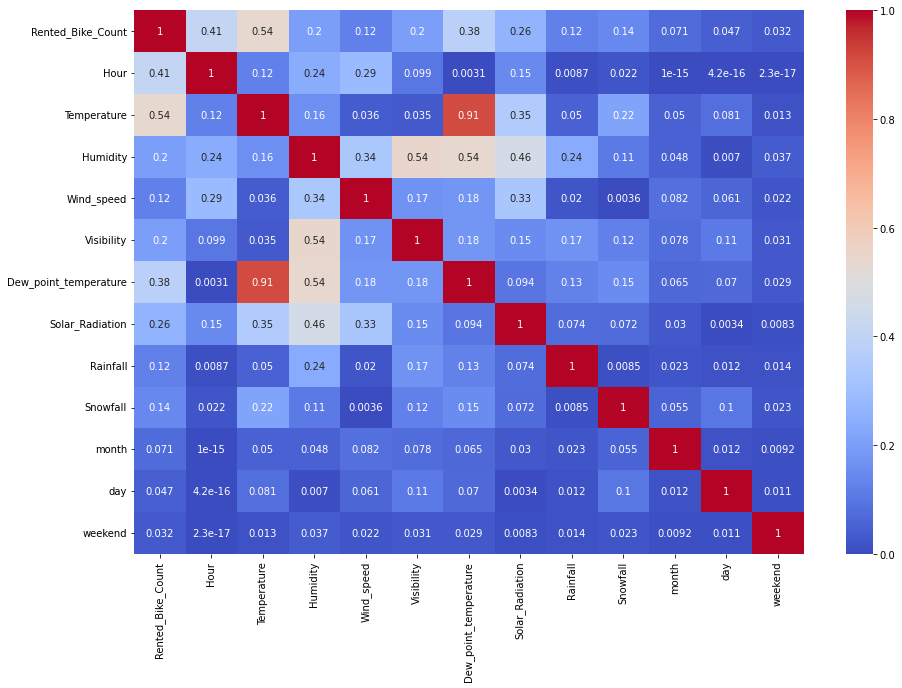

In [225]:
# Correlation Heatmap visualization code
correlation_=bsds.corr()
fig = plt.figure(figsize=(15, 10))
sns.heatmap(data=abs(correlation_),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

In [226]:
# Drop the column of dew point temperature because of reducing Multicollinearity

bsds.drop(['Dew_point_temperature'],axis=1,inplace=True)

In [227]:
# Drop the day_name column because of we have alternate of it 

bsds.drop(['day_name'],axis=1,inplace=True)

In [228]:
# lets see how our dataset looks 

bsds.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall Seasons     Holiday Functioning_Day  \
0              0.0       0.0       0.0  Winter  No Holiday             Yes   
1              0.0       0.0       0.0  Winter  No Holiday             Yes   
2              0.0       0.0       0.0  Winter  No Holiday             Yes   
3              0.0       0.0       0.0  Winter  No Holiday             Yes   
4              0.0       0.0       0.0  Winter  No Holiday             Yes   

   month  day  weekend  
0      1   12        0  
1      1   12        0  
2      1   12        0  
3      1   12        0  
4      1   12        0

In [229]:
# Multicollinearity calculation function

from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [230]:
# caculate vif of our dataset with removing our target variable

Calculate_vif(bsds[[i for i in bsds.describe().columns if i not in ['Rented_Bike_Count']]])

variables       VIF
0              Hour  4.003324
1       Temperature  3.243151
2          Humidity  6.849374
3        Wind_speed  4.622382
4        Visibility  5.521674
5   Solar_Radiation  2.286315
6          Rainfall  1.081698
7          Snowfall  1.137598
8             month  4.606088
9               day  3.852824
10          weekend  1.400900

In [231]:
# removing variables with high vif values

Calculate_vif(bsds[[i for i in bsds.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables       VIF
0             Hour  3.993565
1      Temperature  2.664934
2       Wind_speed  4.366713
3       Visibility  5.500992
4  Solar_Radiation  1.902310
5         Rainfall  1.046925
6         Snowfall  1.111268
7            month  3.945685
8              day  3.439256
9          weekend  1.382196

In [232]:
# removing variables with high vif values

Calculate_vif(bsds[[i for i in bsds.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])

variables       VIF
0             Hour  3.857855
1      Temperature  2.638554
2       Wind_speed  3.894863
3  Solar_Radiation  1.900662
4         Rainfall  1.030985
5         Snowfall  1.103299
6            month  3.398803
7              day  3.332746
8          weekend  1.363051

In [233]:
# Drop the humidity feature bases on its vif value

bsds.drop(['Humidity'],axis=1,inplace=True)

In [234]:
# Drop the visibility feature bases on its vif value

bsds.drop(['Visibility'],axis=1,inplace=True)

In [235]:
bsds.head()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
0                254     0         -5.2         2.2              0.0   
1                204     1         -5.5         0.8              0.0   
2                173     2         -6.0         1.0              0.0   
3                107     3         -6.2         0.9              0.0   
4                 78     4         -6.0         2.3              0.0   

   Rainfall  Snowfall Seasons     Holiday Functioning_Day  month  day  weekend  
0       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
1       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
2       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
3       0.0       0.0  Winter  No Holiday             Yes      1   12        0  
4       0.0       0.0  Winter  No Holiday             Yes      1   12        0

In [236]:
# check the values for seasons columns

bsds['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [237]:
# create dummy colums (ONE_HOT_ENCODING)

bsds=pd.get_dummies(bsds,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [238]:
# check values for Holiday column

bsds['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [239]:
# Holiday is a categorical column so convert it into numarical

bsds['Holiday']=bsds['Holiday'].map({'No Holiday':0, 'Holiday':1})
bsds.sample()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
2558               1294    14         12.1         2.3             2.26   

      Rainfall  Snowfall  Holiday Functioning_Day  month  day  weekend  \
2558       0.0       0.0        0             Yes      3   17        1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
2558               1               0               0

In [240]:
# check values for Function day column

bsds['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [241]:
# Functioning_day is a categorical column so convert it into numarical

bsds['Functioning_Day']=bsds['Functioning_Day'].map({'Yes':1, 'No':0})
bsds.sample(10)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Solar_Radiation  \
4238               1448    14         28.3         2.3             3.14   
6923               1212    11         25.2         1.2             1.31   
624                 133     0         -7.9         2.2             0.00   
2223               1238    15         16.0         2.2             2.33   
7684                157     4          9.7         0.0             0.00   
7426                  2    10         17.0         1.5             0.15   
4221               1740    21         19.1         1.4             0.00   
8279                676    23         10.3         1.3             0.00   
2078                572    14          7.0         2.4             2.52   
2720                424     8          4.5         0.4             0.19   

      Rainfall  Snowfall  Holiday  Functioning_Day  month  day  weekend  \
4238       0.0       0.0        0                1      5   26        1   
6923       0.0       0.0        0                1      9   15        1   
624        0.0       0.0        0                1     12   27        0   
2223       0.0       0.0        0                1      3    3        1   
7684       0.0       0.0        0                1     10   17        0   
7426       6.0       0.0        0                1      6   10        1   
4221       0.0       0.0        0                1      5   25        0   
8279       0.0       0.0        0                1     10   11        0   
2078       0.0       0.0        0                1      2   25        1   
2720       0.0       0.0        0                1      3   24        1   

      Seasons_Spring  Seasons_Summer  Seasons_Winter  
4238               1               0               0  
6923               0               0               0  
624                0               0               1  
2223               1               0               0  
7684               0               0               0  
7426               0               0               0  
4221               1               0               0  
8279               0               0               0  
2078               0               0               1  
2720               1               0               0

In [242]:
# check for the data type of all columns

bsds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Wind_speed         8760 non-null   float64
 4   Solar_Radiation    8760 non-null   float64
 5   Rainfall           8760 non-null   float64
 6   Snowfall           8760 non-null   float64
 7   Holiday            8760 non-null   int64  
 8   Functioning_Day    8760 non-null   int64  
 9   month              8760 non-null   int64  
 10  day                8760 non-null   int64  
 11  weekend            8760 non-null   int64  
 12  Seasons_Spring     8760 non-null   uint8  
 13  Seasons_Summer     8760 non-null   uint8  
 14  Seasons_Winter     8760 non-null   uint8  
dtypes: float64(5), int64(7), uint8(3)
memory usage: 847.0 KB


## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [243]:
# create independent and dependent variable

# x is the independent variale

x=bsds.drop(['Rented_Bike_Count'],axis=1)

# y is the dependent variable

y=np.sqrt(bsds['Rented_Bike_Count'])

In [244]:
# import train test split

from sklearn.model_selection import train_test_split

# apply train test split on dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [245]:
# check the shape of the train and test data

for i in [x_train,x_test,y_train,y_test]:
  print(i.shape)

(6570, 14)
(2190, 14)
(6570,)
(2190,)


In [246]:
# apply scaling to normalize the values

# imprt minmax scaler

from sklearn.preprocessing import MinMaxScaler

# create instance of minmax scaler

min_max=MinMaxScaler()

# apply scaling on both x test and x train data

x_train=min_max.fit_transform(x_train)
x_test=min_max.transform(x_test)

In [247]:
# import linearRegression 

from sklearn.linear_model import LinearRegression

# make object of linear regression

rgone=LinearRegression()

In [248]:
# train the model on linear regression

rgone.fit(x_train,y_train)

LinearRegression()

In [249]:
# cofecient of the hyperplane is

rgone.coef_

array([ 13.21413035,  23.00853962,   2.46553824,   3.97233009,
       -67.7890697 , -10.5279705 ,  -2.53627475,  28.19011382,
         0.96272088,   0.58292935,  -0.53753148,  -3.22038937,
        -3.35777676,  -6.95263852])

In [250]:
#intercept of the hyperplane

rgone.intercept_

-20.73084653238608

In [251]:
# predict the value on training data

y_predict_train=rgone.predict(x_train)

In [252]:
# import performance matrics and predict on training data 

from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score
mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.87643930620335 60.56305949447848 7.782227155157994 0.6107931666315705


In [253]:
# create dictionary for storing the values of matrix in dataframe

lr_train_dict={'Model':"Linear Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [254]:
# create dataframe for traing model accuracy

traning_performance=pd.DataFrame(lr_train_dict,index=[1])
traning_performance

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.8764  60.5631  7.7822    0.6108

In [255]:
# predict the value on test data

y_predict=rgone.predict(x_test)

In [256]:
# check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.78248876828358 57.48470146128528 7.581866621174846 0.624732112412902


In [257]:
# create dictionary for storing the values of matrix in dataframe

lr_test_dict={'Model':"Linear Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [258]:
# create dataframe for traing model accuracy

test_performance=pd.DataFrame(lr_test_dict,index=[1])
test_performance

Model     MAE      MSE    RMSE  R2_score
1  Linear Regression  5.7825  57.4847  7.5819    0.6247

In [259]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_predict,y_test):
  '''Plot scatter plot for y_test values and 
  y_test values. To check how close we are to regresson line'''
  plt.figure(figsize=(16,5))
  sns.regplot(x=y_test,y=y_predict,scatter_kws={'color':'#2794a1'},line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

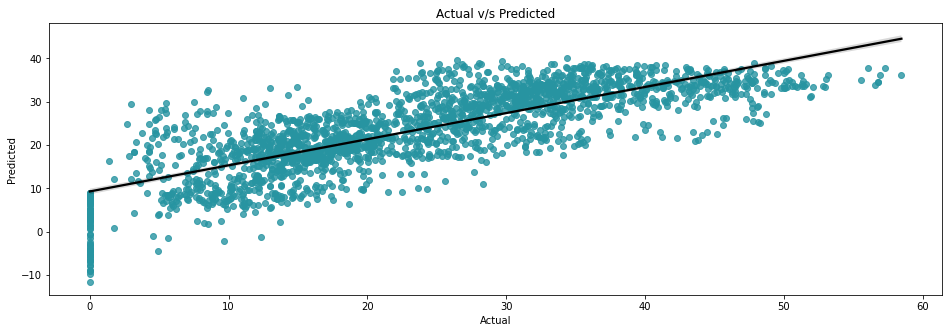

In [260]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [261]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [262]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 Lasso Regression

In [263]:
#Import Lasso
from sklearn.linear_model import Lasso
rgtwo=Lasso(alpha=0.01)

In [264]:
rgtwo.fit(x_train,y_train)

Lasso(alpha=0.01)

In [265]:
rgtwo.coef_

array([ 13.24327664,  22.20395395,   1.86393965,   4.16464073,
       -58.84953458,  -6.03296937,  -2.23329415,  27.73860607,
         0.86757486,   0.4041282 ,  -0.47081345,  -3.04072797,
        -2.99604748,  -7.06294534])

In [266]:
rgtwo.intercept_

-19.85351079843486

In [267]:
rgtwo.score(x_train,y_train)

0.609755980021967

In [268]:
rgtwo.score(x_test,y_test)

0.6212896820907564

In [269]:
y_predict_train=rgtwo.predict(x_train)
y_predict=rgtwo.predict(x_test)

In [270]:
# check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.891626968607316 60.72445232974979 7.792589577909887 0.609755980021967


In [271]:
#create dictionary for storing the values of matrix in dataframe

lasso_train_dict={'Model':"Lasso Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [272]:
# update dataframe for traing model accuracy

traning_performance=traning_performance.append(lasso_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8764  60.5631  7.7822    0.6108
1   Lasso Regression  5.8916  60.7245  7.7926    0.6098

In [273]:
# check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.801611313764016 58.01202363809661 7.6165624554714055 0.6212896820907564


In [274]:
#create dictionary for storing the values of matrix in dataframe

lasso_test_dict={'Model':"Lasso Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [275]:
# update dataframe for traing model accuracy

test_performance=test_performance.append(lasso_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.7825  57.4847  7.5819    0.6247
1   Lasso Regression  5.8016  58.0120  7.6166    0.6213

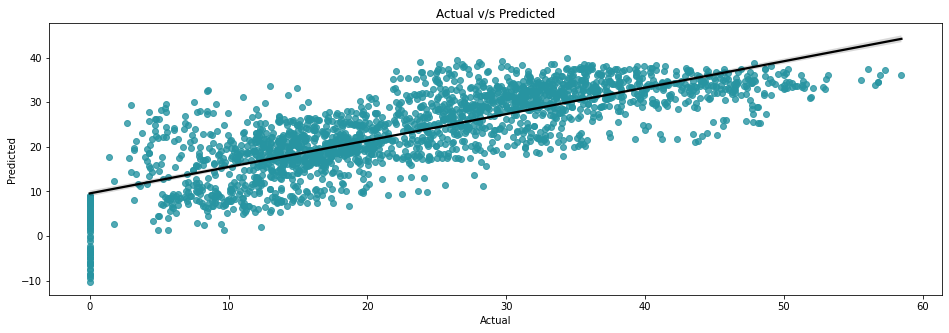

In [276]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [277]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [278]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Ridge Regression

In [279]:
# Import Ridge Regression
from sklearn.linear_model import Ridge
rgthree=Ridge(alpha=0.1)

In [280]:
rgthree.fit(x_train,y_train)

Ridge(alpha=0.1)

In [281]:
rgthree.coef_

array([ 13.21339708,  22.97020426,   2.46015768,   3.99006678,
       -66.86798753, -10.46388265,  -2.53326102,  28.17448055,
         0.96414411,   0.58190946,  -0.53673913,  -3.22012017,
        -3.3505518 ,  -6.95833712])

In [282]:
rgthree.intercept_

-20.702027624442792

In [283]:
y_predict_train=rgthree.predict(x_train)
y_predict=rgthree.predict(x_test)

In [284]:
# check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

5.877410290988818 60.56402642608749 7.7822892792601515 0.6107869526722236


In [285]:
#create dictionary for storing the values of matrix in dataframe

ridge_train_dict={'Model':"Ridge Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [286]:
# update dataframe for traing model accuracy

traning_performance=traning_performance.append(ridge_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.8764  60.5631  7.7822    0.6108
1   Lasso Regression  5.8916  60.7245  7.7926    0.6098
2   Ridge Regression  5.8774  60.5640  7.7823    0.6108

In [287]:
# check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.783577444159729 57.52007120755608 7.584198784812808 0.6245012139367836


In [288]:
#create dictionary for storing the values of matrix in dataframe

ridge_test_dict={'Model':"Ridge Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [289]:
# update dataframe for traing model accuracy

test_performance=test_performance.append(ridge_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0  Linear Regression  5.7825  57.4847  7.5819    0.6247
1   Lasso Regression  5.8016  58.0120  7.6166    0.6213
2   Ridge Regression  5.7836  57.5201  7.5842    0.6245

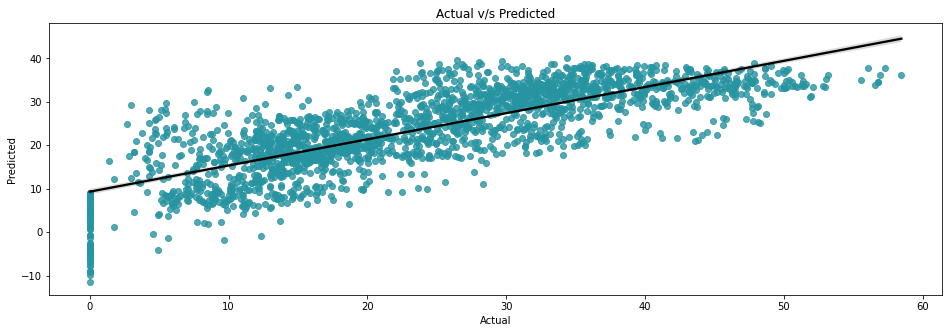

In [290]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

## ML Model - 4 ElasticNet

In [291]:
from sklearn.linear_model import ElasticNet
rgfor=ElasticNet(alpha=0.001,l1_ratio=0.5)

In [292]:
rgfor.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [293]:
rgfor.coef_

array([ 13.20205642,  21.80817928,   2.29322303,   4.42321252,
       -46.36360228,  -8.58663043,  -2.43634952,  27.656435  ,
         0.98044165,   0.55895729,  -0.51613402,  -3.18878124,
        -3.08707216,  -7.14740514])

In [294]:
rgfor.intercept_

-19.743515944244976

In [295]:
y_predict_train=rgfor.predict(x_train)
y_predict=rgfor.predict(x_test)

In [296]:
# check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)


5.914393400867451 61.10024871701602 7.816664807769105 0.6073409348921461


In [297]:
#create dictionary for storing the values of matrix in dataframe

En_train_dict={'Model':"ElasticNet Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [298]:
# update dataframe for traing model accuracy

traning_performance=traning_performance.append(En_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0      Linear Regression  5.8764  60.5631  7.7822    0.6108
1       Lasso Regression  5.8916  60.7245  7.7926    0.6098
2       Ridge Regression  5.8774  60.5640  7.7823    0.6108
3  ElasticNet Regression  5.9144  61.1002  7.8167    0.6073

In [299]:
# check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

5.824705856646372 58.71122396076544 7.662324970970981 0.616725208040824


In [300]:
#create dictionary for storing the values of matrix in dataframe

En_test_dict={'Model':"ElasticNet Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [301]:
# update dataframe for traing model accuracy

test_performance=test_performance.append(En_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0      Linear Regression  5.7825  57.4847  7.5819    0.6247
1       Lasso Regression  5.8016  58.0120  7.6166    0.6213
2       Ridge Regression  5.7836  57.5201  7.5842    0.6245
3  ElasticNet Regression  5.8247  58.7112  7.6623    0.6167

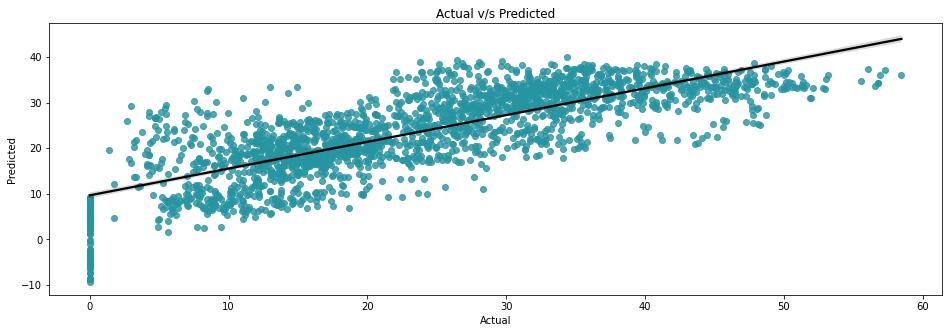

In [302]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

## ML Model - 5 Decision Tree

In [303]:
from sklearn.tree import DecisionTreeRegressor

D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

D_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [304]:
y_predict_train=D_tree.predict(x_train)
y_predict=D_tree.predict(x_test)

In [305]:
# check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

2.8591466162382306 18.130703114317896 4.258016335609564 0.8834835359248959


In [306]:
#create dictionary for storing the values of matrix in dataframe

Dtree_train_dict={'Model':"Decision Tree Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [307]:
# update dataframe for traing model accuracy

traning_performance=traning_performance.append(Dtree_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0         Linear Regression  5.8764  60.5631  7.7822    0.6108
1          Lasso Regression  5.8916  60.7245  7.7926    0.6098
2          Ridge Regression  5.8774  60.5640  7.7823    0.6108
3     ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4  Decision Tree Regression  2.8591  18.1307  4.2580    0.8835

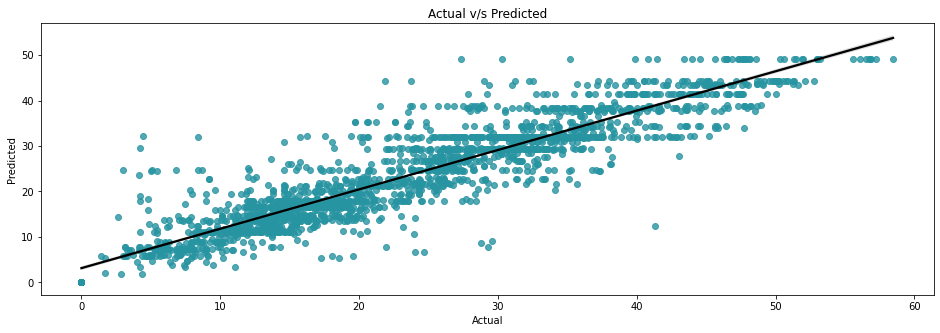

In [308]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

#### Hyperperameter tuning

In [309]:
#create dictionary for storing the values of matrix in dataframe

tree=DecisionTreeRegressor()
parameters={'criterion': ["mae","squared_error","poisson"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }

In [310]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae', 'squared_error', 'poisson'],
                         'max_depth': [3, 5, 7, 9, None],
                         'max_features': ['auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [311]:
tuning_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'auto',
 'splitter': 'best'}

In [312]:
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto',criterion='squared_error')

D_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [313]:
y_predict_train=D_tree.predict(x_train)
y_predict=D_tree.predict(x_test)

In [314]:
# check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

2.8591466162382306 18.130703114317896 4.258016335609564 0.8834835359248959


In [315]:
#create dictionary for storing the values of matrix in dataframe

Ht_Dtree_train_dict={'Model':"Decision Tree Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [316]:
# update dataframe for traing model accuracy

traning_performance=traning_performance.append(Ht_Dtree_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835

In [317]:
# check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

3.395272095970518 24.169424248914467 4.916240865632447 0.8422187373070908


In [318]:
#create dictionary for storing the values of matrix in dataframe

Ht_Dtree_test_dict={'Model':"Decision Tree Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [319]:
# update dataframe for traing model accuracy

test_performance=test_performance.append(Ht_Dtree_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4  Decision Tree Regression(Hyper Tuning)  3.3953  24.1694  4.9162    0.8422

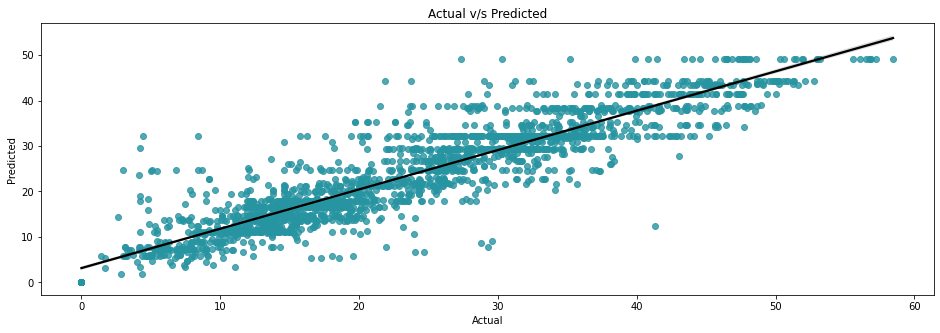

In [320]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

# ML Model - 6 Random Forest

In [321]:
#Import Random Forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [322]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [323]:
y_predict_train=rf.predict(x_train)
y_predict=rf.predict(x_test)

In [324]:
# check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

0.879263199064052 1.9121961576469195 1.3828218097957956 0.9877113240726405


In [325]:
#create dictionary for storing the values of matrix in dataframe

RandomFoorest_train_dict={'Model':"Random Forest Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [326]:
# update dataframe for traing model accuracy

traning_performance=traning_performance.append(RandomFoorest_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835
6                Random Forest Regression  0.8793   1.9122  1.3828    0.9877

In [327]:
# check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

2.345885269787922 13.60000874627033 3.687818968749731 0.9112173078463994


In [328]:
#create dictionary for storing the values of matrix in dataframe

RandomForest_test_dict={'Model':"Random Forest Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [329]:
# update dataframe for traing model accuracy

test_performance=test_performance.append(RandomForest_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4  Decision Tree Regression(Hyper Tuning)  3.3953  24.1694  4.9162    0.8422
5                Random Forest Regression  2.3459  13.6000  3.6878    0.9112

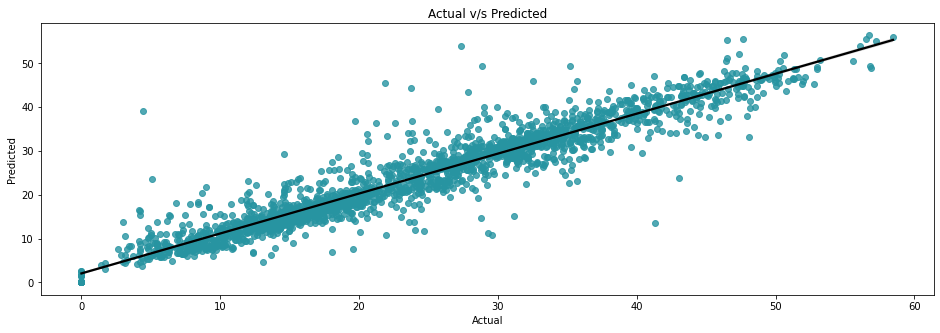

In [330]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

In [331]:
x.columns

Index(['Hour', 'Temperature', 'Wind_speed', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Holiday', 'Functioning_Day', 'month', 'day', 'weekend',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [332]:
rf.feature_importances_

array([0.25513596, 0.28496666, 0.01774264, 0.05106326, 0.11723682,
       0.00262675, 0.00297996, 0.15695271, 0.01913062, 0.02080386,
       0.01365866, 0.0092069 , 0.0015093 , 0.04698592])

Text(0.5, 0, 'Relative Importance')

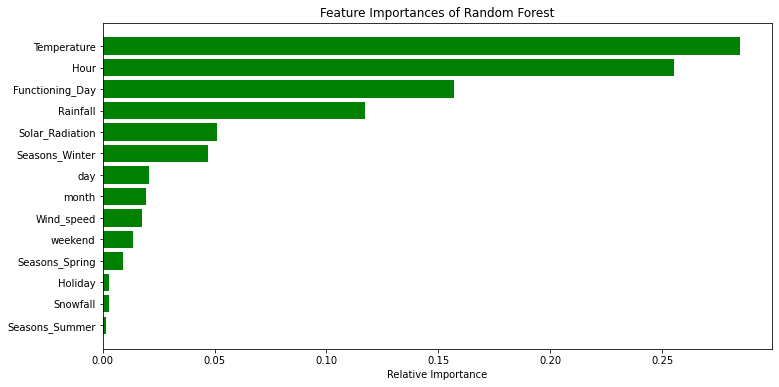

In [333]:
imp_variables=x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances of Random Forest')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Hyperparameter Tuning

In [334]:
param={'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}
     

rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [25, 50, 40, 80, 100]},
             scoring='neg_mean_squared_error')

In [335]:
rf_tuning.best_params_

{'max_depth': 9, 'n_estimators': 50}

In [336]:
rf=RandomForestRegressor(max_depth=9, n_estimators=40)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, n_estimators=40)

In [337]:
y_predict_train=rf.predict(x_train)
y_predict=rf.predict(x_test)

In [338]:
# Check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

2.6059549273556195 14.58695996400692 3.8192878870290623 0.9062573036525542


In [339]:
#Create dictionary for storing the values of matrix in dataframe

Ht_RandomFoorest_train_dict={'Model':"Random Forest Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [340]:
# Update dataframe for traing model accuracy

traning_performance=traning_performance.append(Ht_RandomFoorest_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835
6                Random Forest Regression  0.8793   1.9122  1.3828    0.9877
7  Random Forest Regression(Hyper Tuning)  2.6060  14.5870  3.8193    0.9063

In [341]:
# Check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

2.9876239040977572 19.387728132886508 4.403149796780313 0.8734342947498609


In [342]:
#Create dictionary for storing the values of matrix in dataframe

Ht_RandomForest_test_dict={'Model':"Random Forest Regression(Hyper Tuning)",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [343]:
# update dataframe for traing model accuracy

test_performance=test_performance.append(Ht_RandomForest_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4  Decision Tree Regression(Hyper Tuning)  3.3953  24.1694  4.9162    0.8422
5                Random Forest Regression  2.3459  13.6000  3.6878    0.9112
6  Random Forest Regression(Hyper Tuning)  2.9876  19.3877  4.4031    0.8734

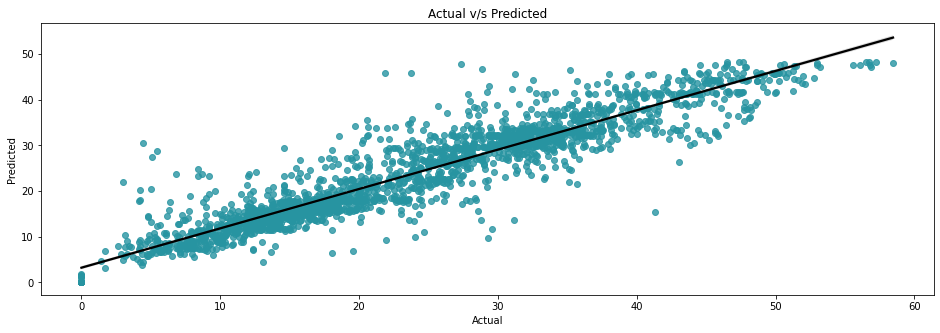

In [344]:
# plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

# XGBoost

In [345]:
#Import XGBoost
import xgboost as xg
xgb=xg.XGBRegressor()

In [346]:
xgb.fit(x_train,y_train)

[09:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [347]:
y_predict_train=xgb.predict(x_train)
y_predict=xgb.predict(x_test)

In [348]:
# Check accuracy on training data

mae=mean_absolute_error(y_train,y_predict_train)
mse=mean_squared_error(y_train,y_predict_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_predict_train)
print(mae,mse,rmse,r2)

3.133591934456839 19.923476383463367 4.463572155064077 0.8719623279004682


In [349]:
#Create dictionary for storing the values of matrix in dataframe

Xgb_train_dict={'Model':"Xgb Regression",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [350]:
# Update dataframe for traing model accuracy

traning_performance=traning_performance.append(Xgb_train_dict,ignore_index=True)
traning_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.8764  60.5631  7.7822    0.6108
1                        Lasso Regression  5.8916  60.7245  7.7926    0.6098
2                        Ridge Regression  5.8774  60.5640  7.7823    0.6108
3                   ElasticNet Regression  5.9144  61.1002  7.8167    0.6073
4                Decision Tree Regression  2.8591  18.1307  4.2580    0.8835
5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307  4.2580    0.8835
6                Random Forest Regression  0.8793   1.9122  1.3828    0.9877
7  Random Forest Regression(Hyper Tuning)  2.6060  14.5870  3.8193    0.9063
8                          Xgb Regression  3.1336  19.9235  4.4636    0.8720

In [351]:
# Check accuracy on test data

mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predict)
print(mae,mse,rmse,r2)

3.2462245081050116 21.237041748419397 4.608366494585624 0.8613617259385838


In [352]:
# Create dictionary for storing the values of matrix in dataframe

Xgb_test_dict={'Model':"Xgb Regrssion",
             'MAE':round(mae,4),
             'MSE':round(mse,4),
             'RMSE':round(rmse,4),
             'R2_score':round(r2,4)}

In [353]:
# Update dataframe for traing model accuracy

test_performance=test_performance.append(Xgb_test_dict,ignore_index=True)
test_performance

Model     MAE      MSE    RMSE  R2_score
0                       Linear Regression  5.7825  57.4847  7.5819    0.6247
1                        Lasso Regression  5.8016  58.0120  7.6166    0.6213
2                        Ridge Regression  5.7836  57.5201  7.5842    0.6245
3                   ElasticNet Regression  5.8247  58.7112  7.6623    0.6167
4  Decision Tree Regression(Hyper Tuning)  3.3953  24.1694  4.9162    0.8422
5                Random Forest Regression  2.3459  13.6000  3.6878    0.9112
6  Random Forest Regression(Hyper Tuning)  2.9876  19.3877  4.4031    0.8734
7                           Xgb Regrssion  3.2462  21.2370  4.6084    0.8614

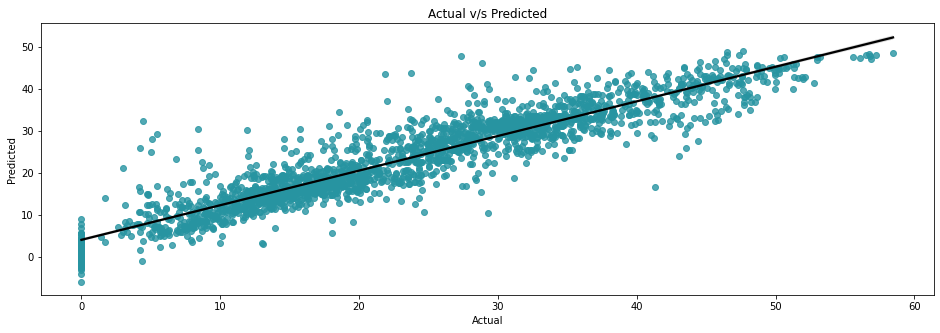

In [354]:
# Plot the graph between actual value vs predicted value

plot_scatter(y_predict,y_test)

In [355]:
# create regression report onthe data

import statsmodels.api as sm

model = sm.OLS(y, x).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Rented_Bike_Count   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              6307.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):                        0.00
Time:                        09:23:08   Log-Likelihood:                         -30612.
No. Observations:                8760   AIC:                                  6.125e+04
Df Residuals:                    8746   BIC:                                  6.135e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [356]:
# Final result

final_result=pd.concat([traning_performance,test_performance],keys=['Training dataset','Test dataset'])
final_result

Model     MAE      MSE  \
Training dataset 0                       Linear Regression  5.8764  60.5631   
                 1                        Lasso Regression  5.8916  60.7245   
                 2                        Ridge Regression  5.8774  60.5640   
                 3                   ElasticNet Regression  5.9144  61.1002   
                 4                Decision Tree Regression  2.8591  18.1307   
                 5  Decision Tree Regression(Hyper Tuning)  2.8591  18.1307   
                 6                Random Forest Regression  0.8793   1.9122   
                 7  Random Forest Regression(Hyper Tuning)  2.6060  14.5870   
                 8                          Xgb Regression  3.1336  19.9235   
Test dataset     0                       Linear Regression  5.7825  57.4847   
                 1                        Lasso Regression  5.8016  58.0120   
                 2                        Ridge Regression  5.7836  57.5201   
                 3                   ElasticNet Regression  5.8247  58.7112   
                 4  Decision Tree Regression(Hyper Tuning)  3.3953  24.1694   
                 5                Random Forest Regression  2.3459  13.6000   
                 6  Random Forest Regression(Hyper Tuning)  2.9876  19.3877   
                 7                           Xgb Regrssion  3.2462  21.2370   

                      RMSE  R2_score  
Training dataset 0  7.7822    0.6108  
                 1  7.7926    0.6098  
                 2  7.7823    0.6108  
                 3  7.8167    0.6073  
                 4  4.2580    0.8835  
                 5  4.2580    0.8835  
                 6  1.3828    0.9877  
                 7  3.8193    0.9063  
                 8  4.4636    0.8720  
Test dataset     0  7.5819    0.6247  
                 1  7.6166    0.6213  
                 2  7.5842    0.6245  
                 3  7.6623    0.6167  
                 4  4.9162    0.8422  
                 5  3.6878    0.9112  
                 6  4.4031    0.8734  
                 7  4.6084    0.8614

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest with above 91% accuracy

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Text(0.5, 0, 'Relative Importance')

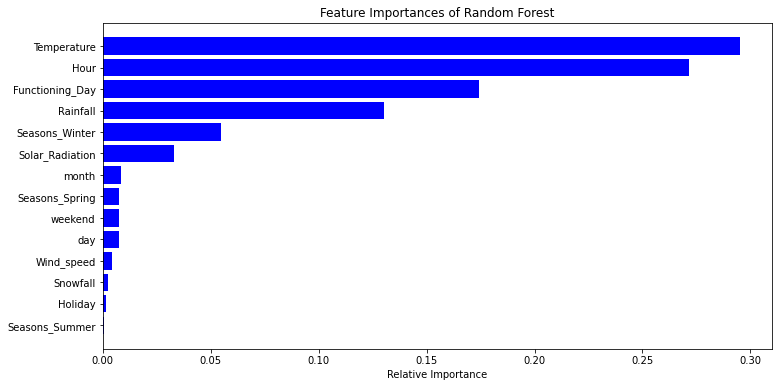

In [357]:
imp_variables=x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances of Random Forest')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

* Temperature play an important role in bike sharing demand which is obesly logical because in lower temprature very less people prefer bike
* Second Hours of the days play an important role because in office time and school time the demand is heigest

# **Conclusion**

* Linear Regression, Lasso Regression, Ridge Regression, ElasticNet Regression performance is almost same on both training data and test data which is likely 60% but this is not sufficient

* Decision Tree performance is around 90% on traning data and 85% on test data in both case before tuning and after tuning

* Xetreme Gradient Boosting performane is good but the test accuracy is not much as compere to Random Forest

* Random Forest performance is very good on training data that means it tends to overfit on traning data but also his test accuracy is very good which is heigest in all comperision. But after tuning the hyperperameter its performace goes down

* Default Values of Random Forest algorithm is performing very good with 98% accuracy on training data and 91% accuracy on test data So i choose Random Forest for this dataset

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***